### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했 (불가시 구매수량)는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_shopping_data.csv')
co_df


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


## 해야할일  
> 송장번호는 날립시다.  
> 날짜 변환하기 (Recency)  
> totalprice 만들기  

In [2]:
shopping_mall_values = co_df['shopping_mall'].unique()
category_values = co_df['category'].unique()
print(shopping_mall_values)
print(category_values)

['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [3]:
co_df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [4]:
co_df.duplicated().sum()

0

In [5]:
duplicate_count = co_df.duplicated(subset=['customer_id']).sum()
print("중복된 고객 ID의 수:", duplicate_count)

중복된 고객 ID의 수: 0


In [6]:
top = co_df['age'].value_counts().sort_index().head(2)
bottom = co_df['age'].value_counts().sort_index().tail(2)
print(top)
print(bottom)


age
18    1844
19    1936
Name: count, dtype: int64
age
68    1893
69    1901
Name: count, dtype: int64


In [7]:
# Quantity 열에서 0 또는 음수가 있는지 확인
negative_quantity = co_df[co_df['quantity'] <= 0]

negative_price = co_df[co_df['price'] <= 0]
print(negative_price)
print(negative_quantity)

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []
Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []


In [8]:
co_df = co_df.drop(columns=['invoice_no'])
co_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [9]:
import pandas as pd

# 'invoice_date' 열을 datetime 형식으로 변환
co_df['invoice_date'] = pd.to_datetime(co_df['invoice_date'], format="%d/%m/%Y")

# 결과 출력

co_df.loc[:, 'Recency'] = pd.to_datetime(co_df['invoice_date'])\
                    .apply(lambda x: (pd.to_datetime(co_df['invoice_date'].max()) - x).days)
co_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,215
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,451
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,484
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,661
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,500
...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,168
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,532
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,710
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,722


In [10]:
sorted_co_df = co_df.sort_values(by='Recency', ascending=False)
sorted_co_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency
13715,C733582,Male,45,Clothing,1,300.08,Cash,2021-01-01,Metropol AVM,796
26192,C164803,Female,65,Souvenir,5,58.65,Cash,2021-01-01,Istinye Park,796
51939,C270560,Female,44,Shoes,4,2400.68,Cash,2021-01-01,Metrocity,796
64535,C619431,Male,30,Food & Beverage,4,20.92,Debit Card,2021-01-01,Viaport Outlet,796
58957,C339057,Male,43,Food & Beverage,2,10.46,Cash,2021-01-01,Kanyon,796
...,...,...,...,...,...,...,...,...,...,...
60070,C205301,Female,53,Technology,4,4200.00,Debit Card,2023-03-08,Kanyon,0
45962,C965588,Female,50,Clothing,2,600.16,Debit Card,2023-03-08,Metrocity,0
62997,C205385,Male,23,Souvenir,2,23.46,Credit Card,2023-03-08,Cevahir AVM,0
80142,C270762,Male,47,Cosmetics,3,121.98,Debit Card,2023-03-08,Forum Istanbul,0


In [11]:
co_df = pd.DataFrame(co_df)
co_df['totalPrice'] = co_df['quantity'] * co_df['price']
co_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency,totalPrice
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,215,7502.00
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,451,5401.53
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,484,300.08
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,661,15004.25
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,500,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,168,293.25
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,532,20.92
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,710,20.92
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,722,16800.00


In [12]:
rfm = co_df[['Recency', 'quantity', 'totalPrice']].copy()

# 새로운 데이터프레임의 열 이름 변경
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm

,Recency,Frequency,Monetary
0,215,5,7502.00
1,451,3,5401.53
2,484,1,300.08
3,661,5,15004.25
4,500,4,242.40
...,...,...,...
99452,168,5,293.25
99453,532,2,20.92
99454,710,2,20.92
99455,722,4,16800.00


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,Recency,Frequency,Monetary
0,0.729899,1.00,0.285648
1,0.433417,0.50,0.205614
2,0.391960,0.00,0.011235
3,0.169598,1.00,0.571505
4,0.371859,0.75,0.009037
...,...,...,...
99452,0.788945,1.00,0.010974
99453,0.331658,0.25,0.000598
99454,0.108040,0.25,0.000598
99455,0.092965,0.75,0.639928


In [14]:
rfm[['Recency', 'Frequency', 'Monetary']].mean()



Recency      0.501402
Frequency    0.500857
Monetary     0.096155
dtype: float64

In [15]:
co_df['TotalScore'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']
co_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency,totalPrice,TotalScore
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,215,7502.00,2.015548
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,451,5401.53,1.139031
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,484,300.08,0.403194
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,661,15004.25,1.741103
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,500,242.40,1.130896
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,168,293.25,1.799919
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,532,20.92,0.582256
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,710,20.92,0.358638
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,722,16800.00,1.482893


In [16]:
import numpy as np

l1, l2, l3, l4 = np.percentile(co_df['TotalScore'], [25, 45, 65, 85])
print(l1, l2, l3, l4)

0.7075966121705765 0.9969507080906359 1.293727390793303 1.6795453046885398


In [17]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [18]:
co_df['Level'] = co_df['TotalScore'].apply(get_level)
co_df['Level'] = co_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
print(co_df['Level'].value_counts())
co_df

Level
Bronze     24866
Silver     19893
Diamond    19892
Gold       19889
VIP        14917
Name: count, dtype: int64


,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency,totalPrice,TotalScore,Level
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,215,7502.00,2.015548,VIP
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,451,5401.53,1.139031,Gold
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,484,300.08,0.403194,Bronze
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,661,15004.25,1.741103,VIP
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,500,242.40,1.130896,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,168,293.25,1.799919,VIP
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,532,20.92,0.582256,Bronze
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,710,20.92,0.358638,Bronze
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,722,16800.00,1.482893,Diamond


In [19]:
# 각 고객의 나이대를 할당하는 함수
def assign_age_group(age):
    if 18 <= age <= 29:
        return '18-29'
    elif 30 <= age <= 39:
        return '30-39'
    elif 40 <= age <= 49:
        return '40-49'
    elif 50 <= age <= 59:
        return '50-59'
    elif 60 <= age <= 70:
        return '60-70'
    # 이하 생략 (나머지 나이대에 대해서도 동일한 방식으로 처리)

# 'AgeGroup' 열 추가
co_df['AgeGroup'] = co_df['age'].apply(assign_age_group)

# 각 나이대별로 'totalPrice'의 합 구하기
total_price_by_age_group = co_df.groupby('AgeGroup')['totalPrice'].sum()

# 결과 출력
print(total_price_by_age_group)

AgeGroup
18-29    58095449.47
30-39    48288158.82
40-49    49234368.09
50-59    47593634.14
60-70    48294183.73
Name: totalPrice, dtype: float64


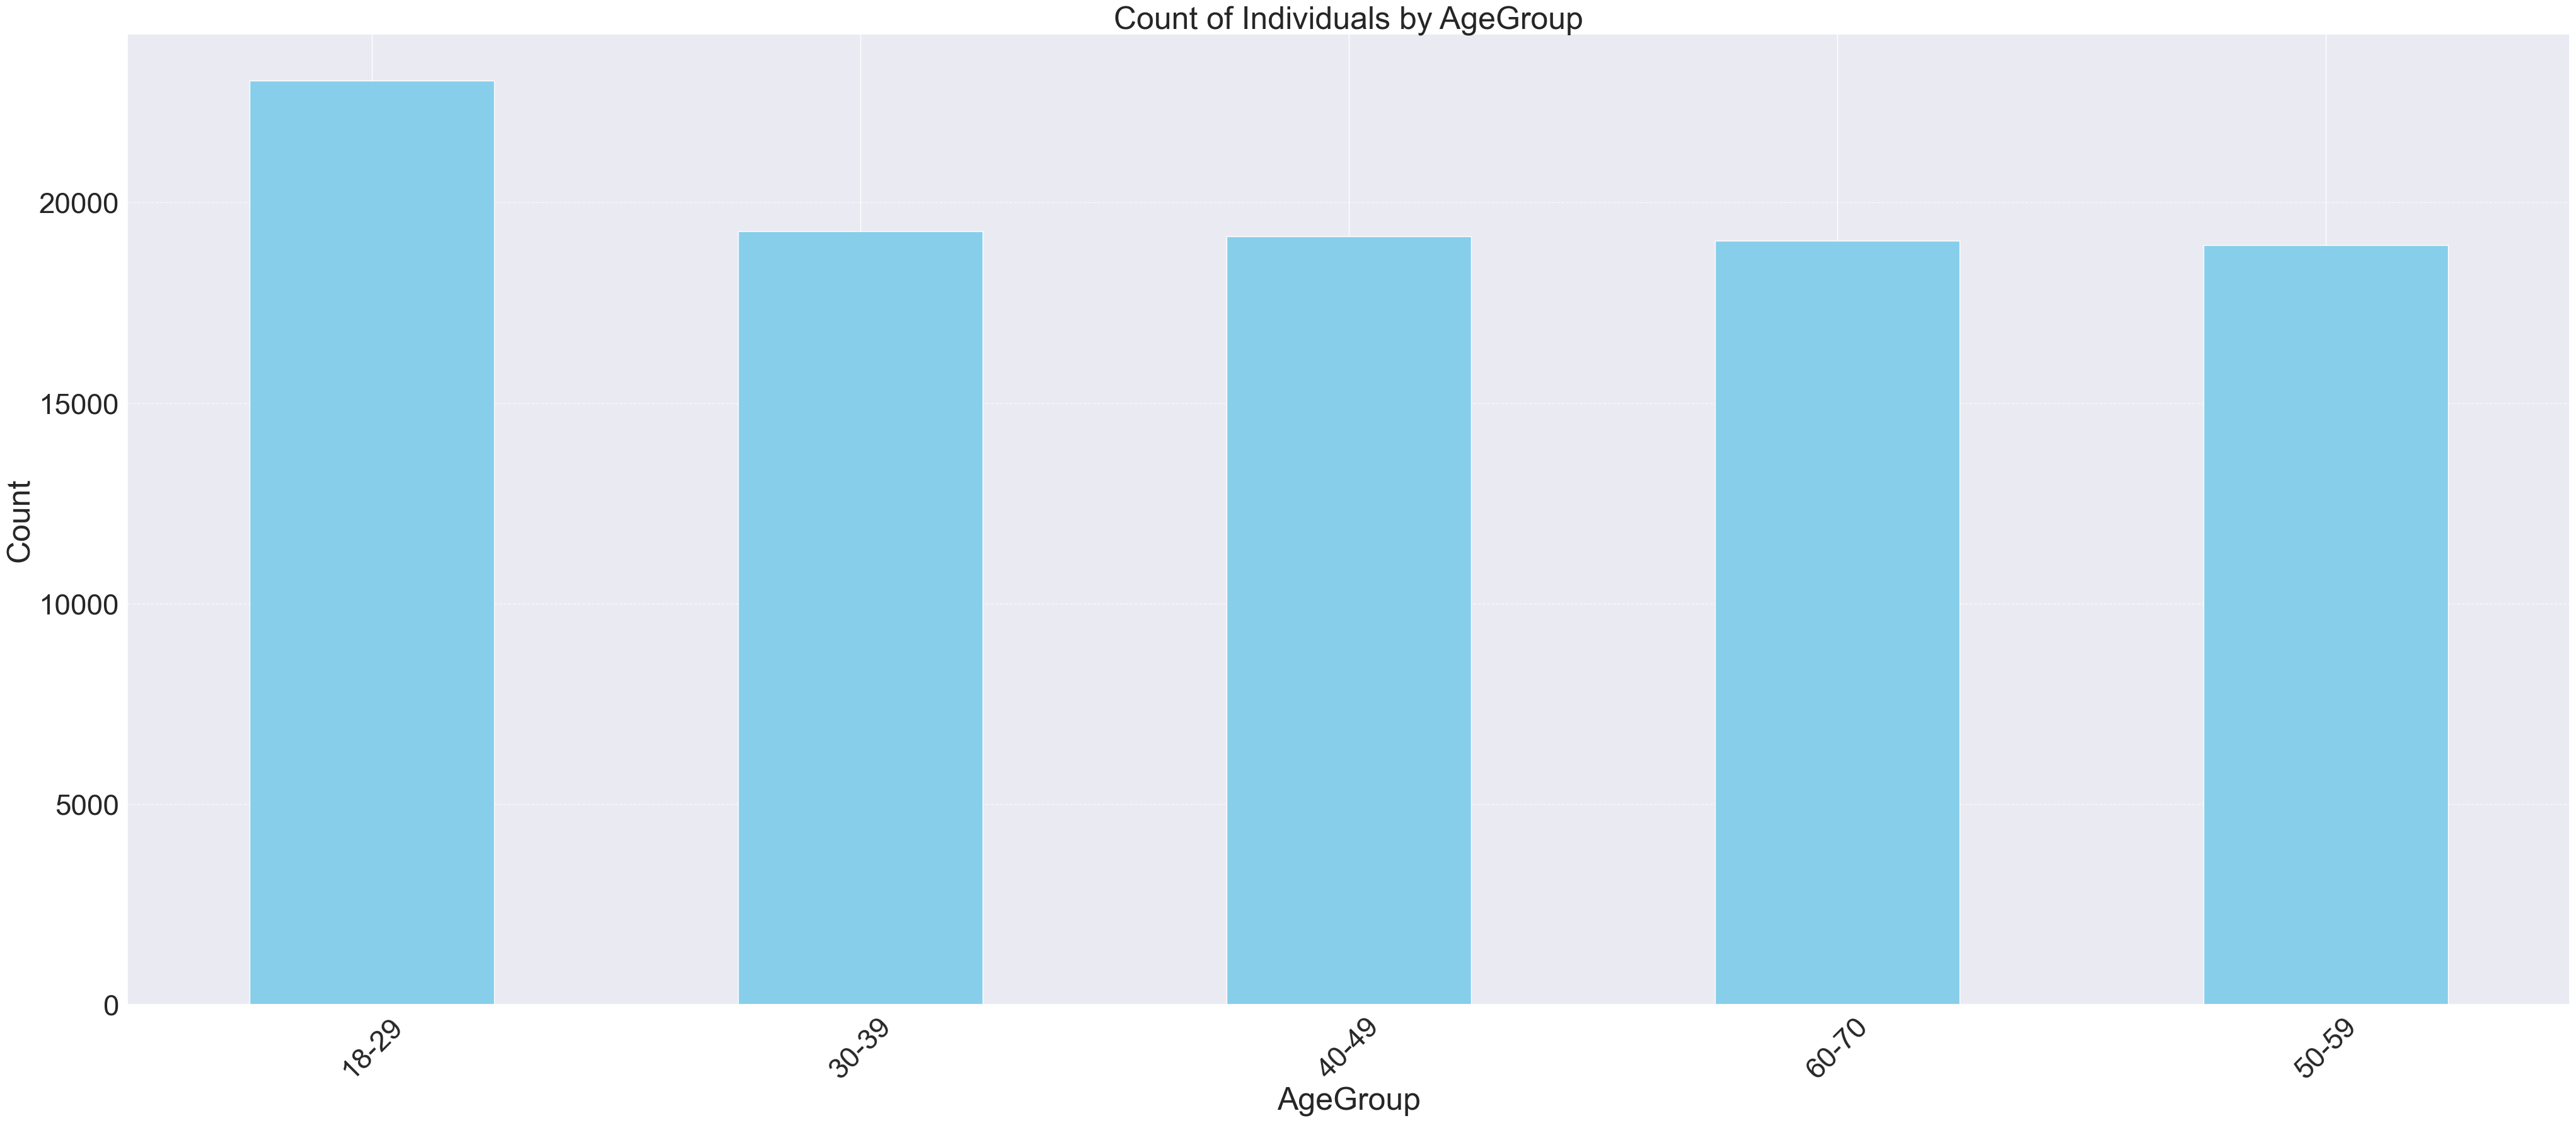

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# AgeGroup 별 빈도 계산
agegroup_counts = co_df['AgeGroup'].value_counts()

# 그래프 생성
sns.set(font_scale=3)
fig, axes = plt.subplots(1, 1, figsize=(50, 20))

agegroup_counts.plot(kind='bar', color='skyblue', ax=axes)  # ax 매개변수를 이용하여 그래프가 그려질 축을 설정
axes.set_title('Count of Individuals by AgeGroup')
axes.set_xlabel('AgeGroup')
axes.set_ylabel('Count')
axes.tick_params(axis='x', rotation=45)  # x 축 라벨 회전
axes.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


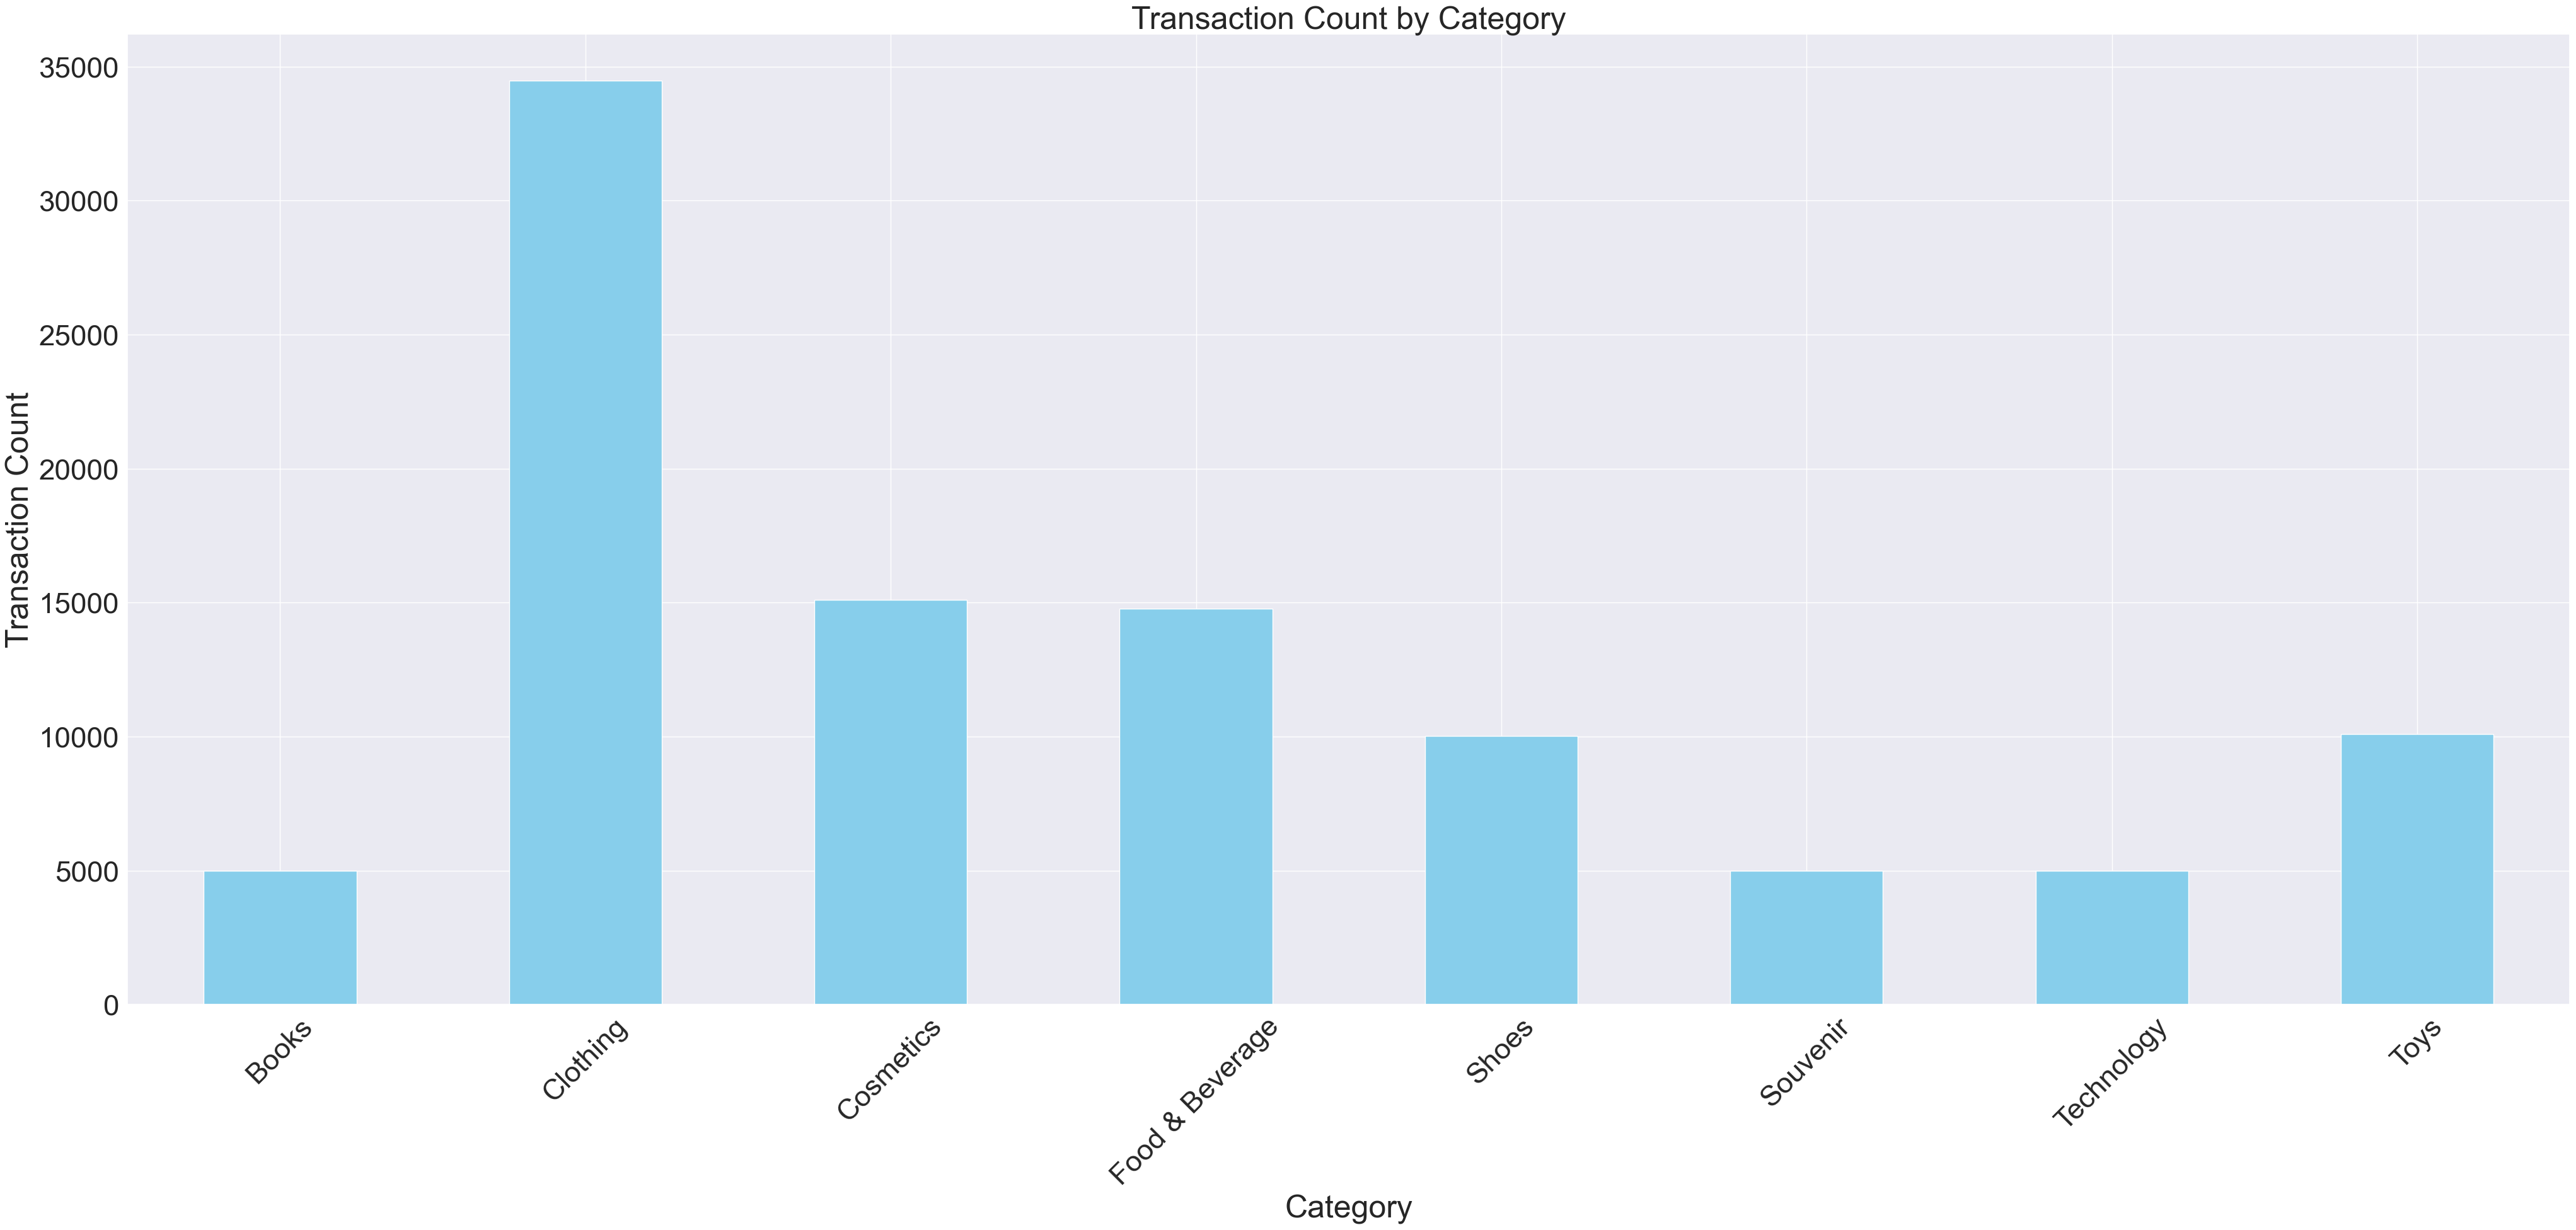

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 카테고리별 거래 횟수 계산
transaction_count_by_category = co_df.groupby('category').size()

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axes = plt.subplots(1, 1, figsize=(50, 20))  # figsize를 수정하여 그래프 크기 조정

# 막대 그래프로 시각화
transaction_count_by_category.plot(kind='bar', color='skyblue', ax=axes)
axes.set_title('Transaction Count by Category')
axes.set_xlabel('Category')
axes.set_ylabel('Transaction Count')
axes.tick_params(axis='x', rotation=45)  # x 축 라벨 회전

plt.show()


category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: totalPrice, dtype: float64


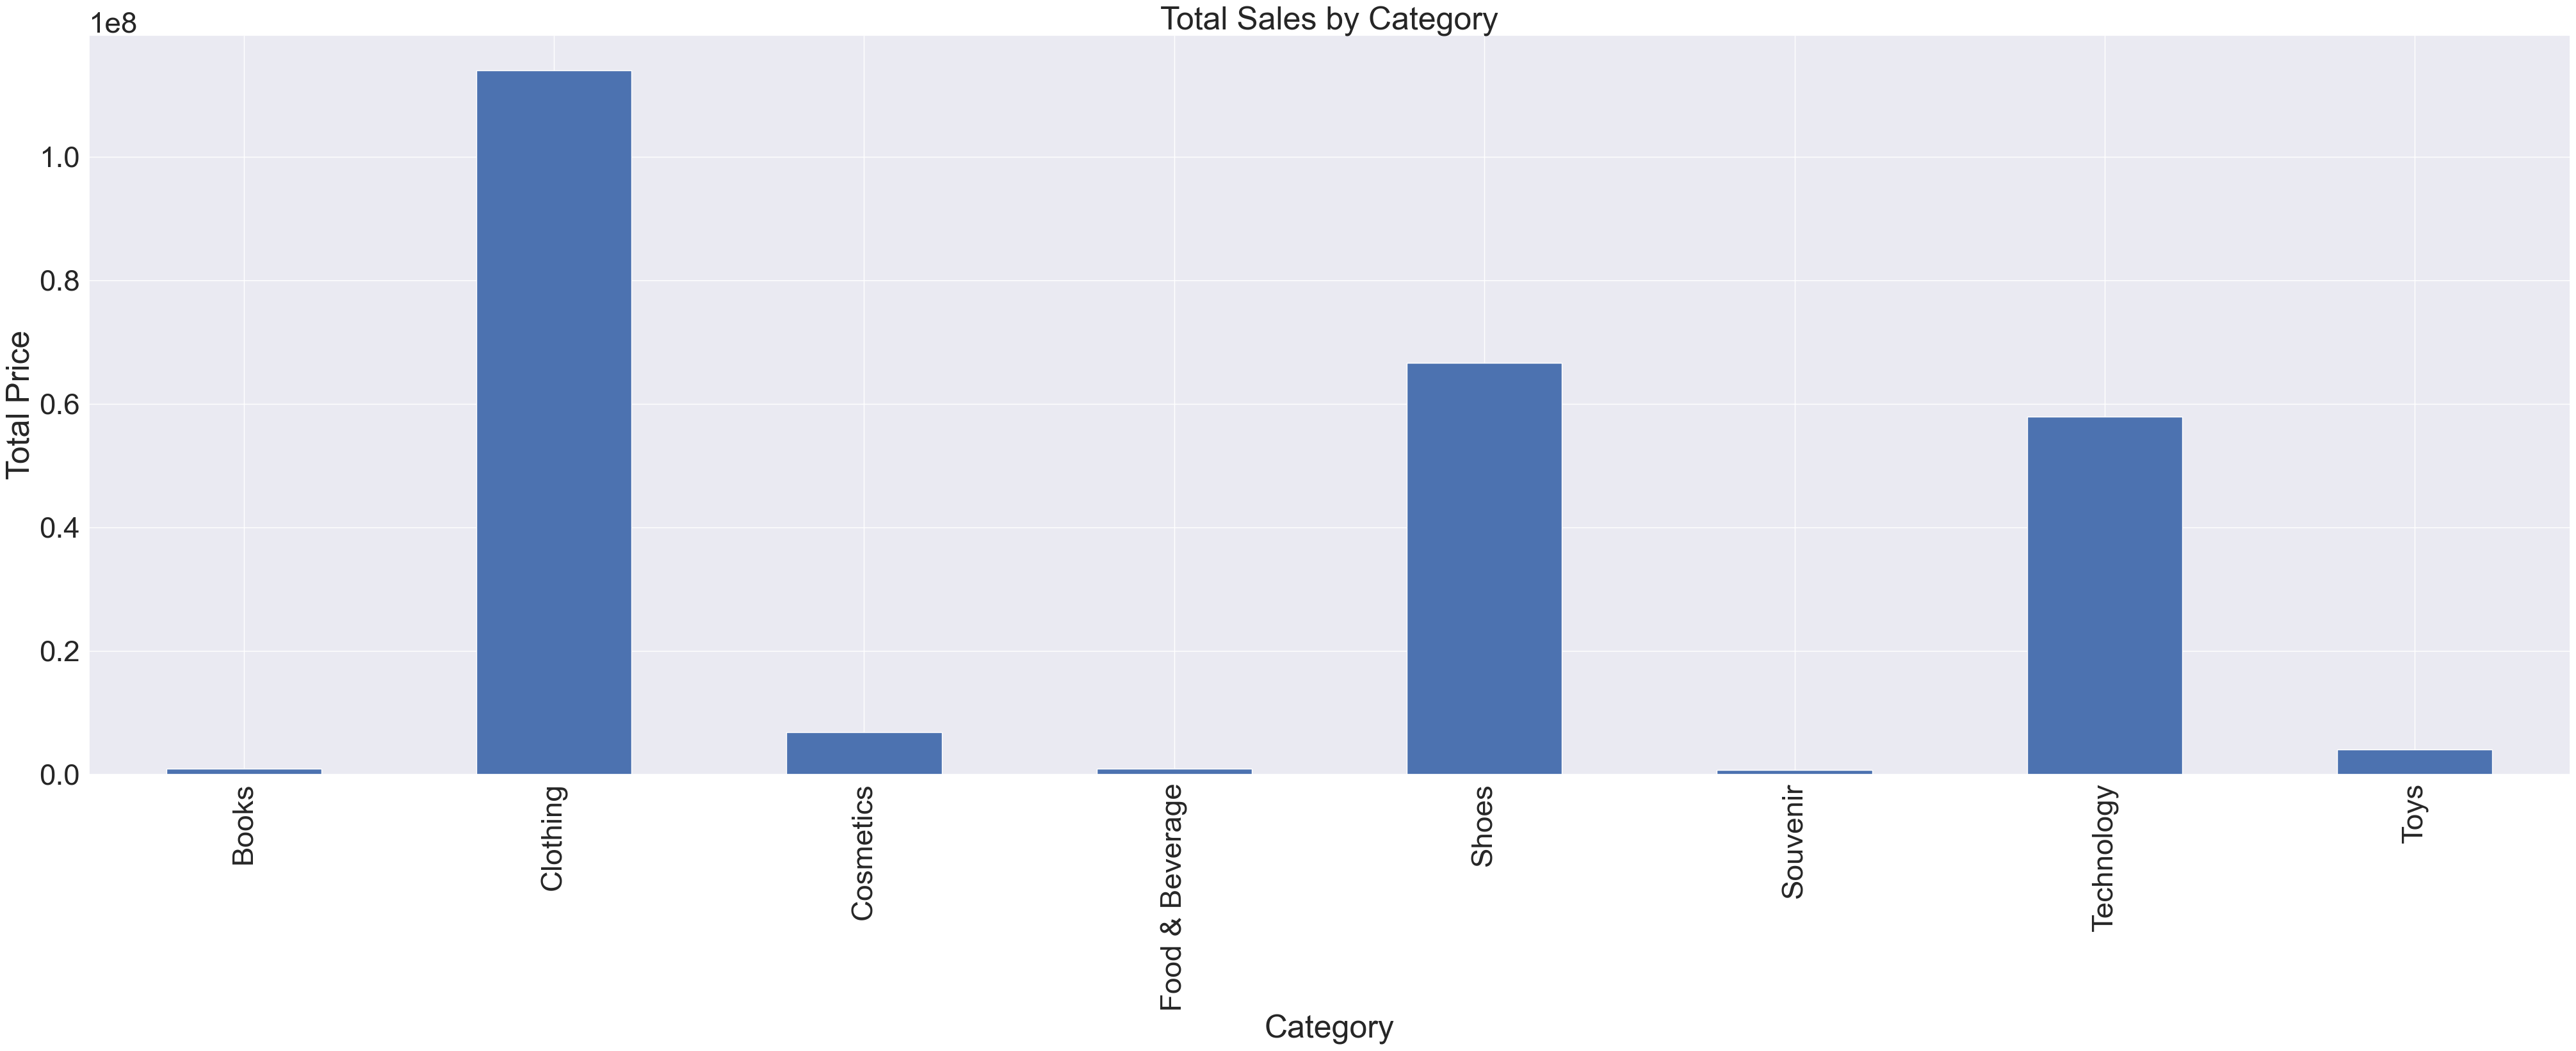

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# category 별 totalPrice 계산
total_price_by_category = co_df.groupby('category')['totalPrice'].sum()

# 결과 출력
print(total_price_by_category)

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axes = plt.subplots(1, 1, figsize=(50, 15))  # figsize를 수정하여 그래프 크기 조정

# 막대 그래프로 카테고리별 totalPrice 시각화
total_price_by_category.plot(kind='bar', ax=axes)
axes.set_title('Total Sales by Category')
axes.set_xlabel('Category')
axes.set_ylabel('Total Price')

plt.show()


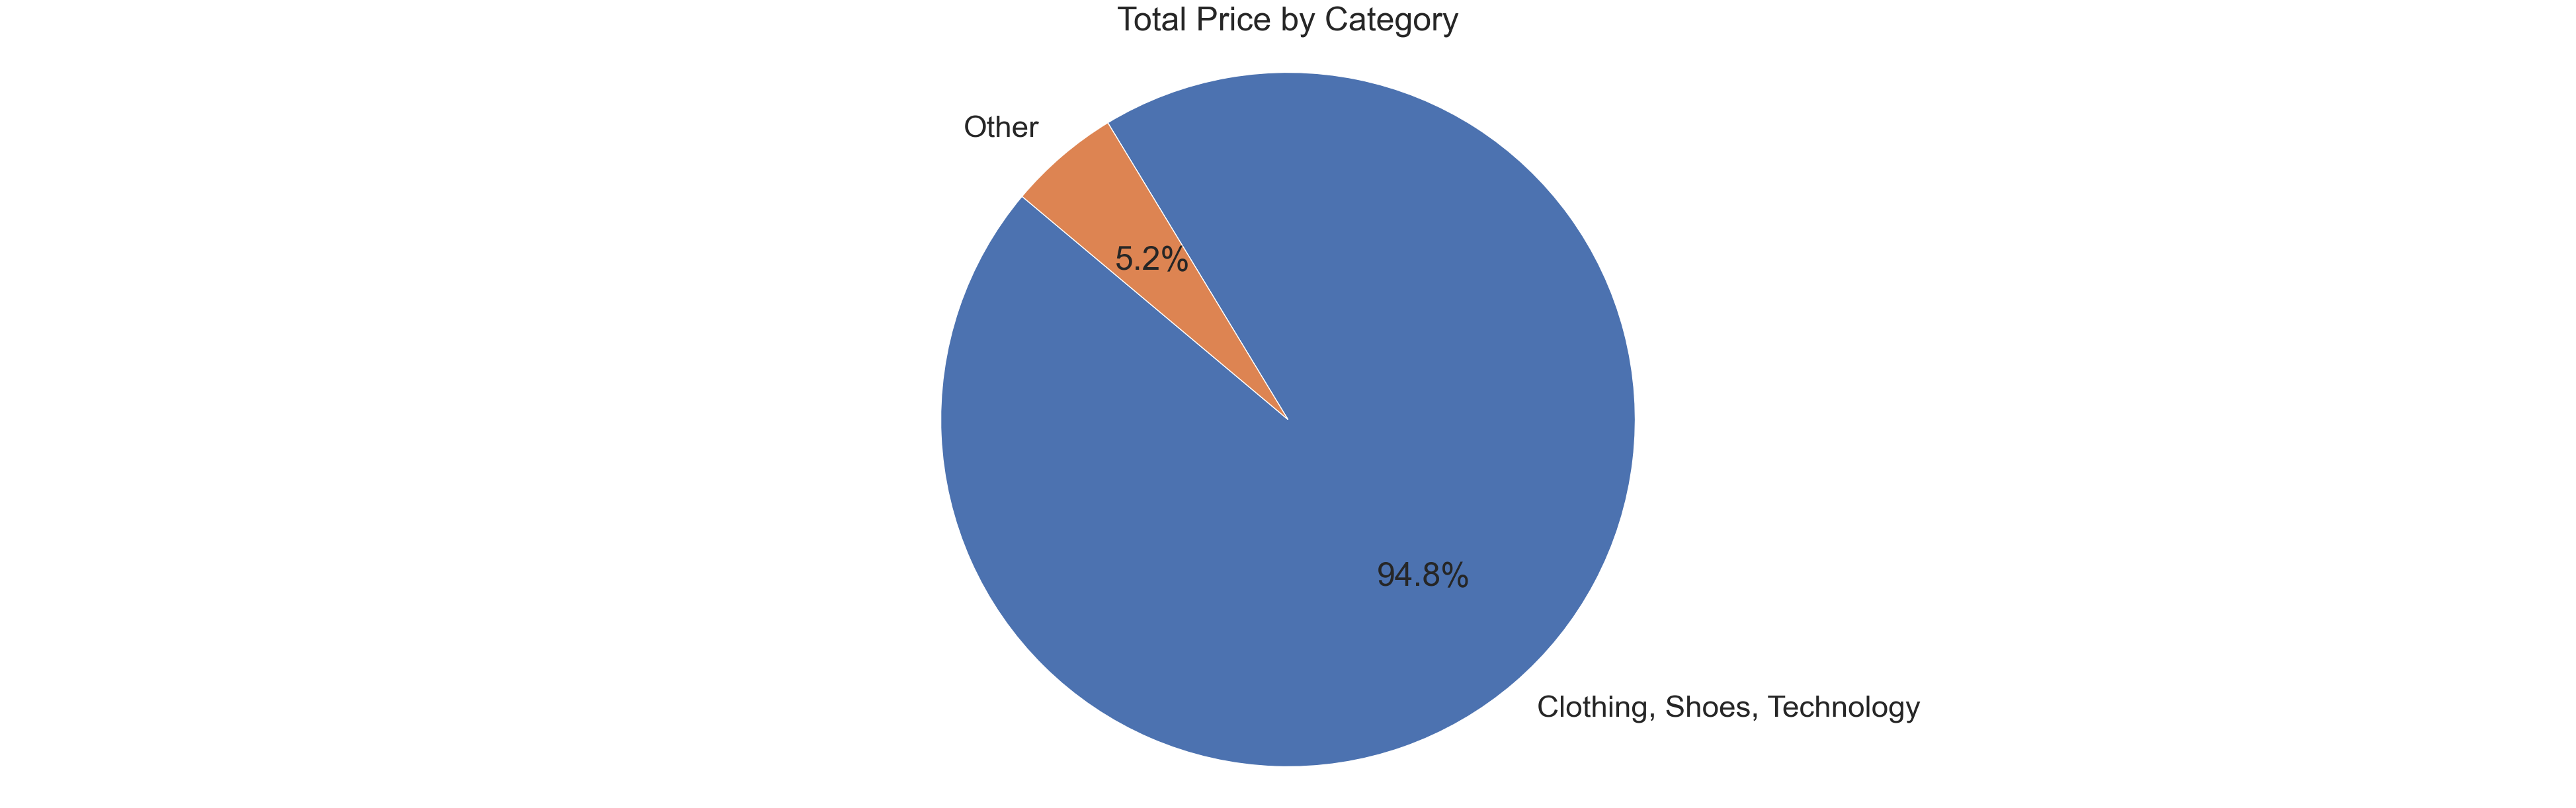

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clothing', 'Shoes', 'Technology' 카테고리의 totalPrice 합계
total_price_clothing_shoes_tech = co_df.loc[co_df['category'].isin(['Clothing', 'Shoes', 'Technology']), 'totalPrice'].sum()

# 나머지 카테고리의 totalPrice 합계
total_price_other = co_df.loc[~co_df['category'].isin(['Clothing', 'Shoes', 'Technology']), 'totalPrice'].sum()

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axes = plt.subplots(1, 1, figsize=(50, 15))  # figsize를 수정하여 그래프 크기 조정

# 원그래프로 시각화
axes.pie([total_price_clothing_shoes_tech, total_price_other], labels=['Clothing, Shoes, Technology', 'Other'], autopct='%1.1f%%', startangle=140)
axes.set_title('Total Price by Category')
axes.axis('equal')  # 원 그래프가 원형으로 보이도록 설정

plt.show()


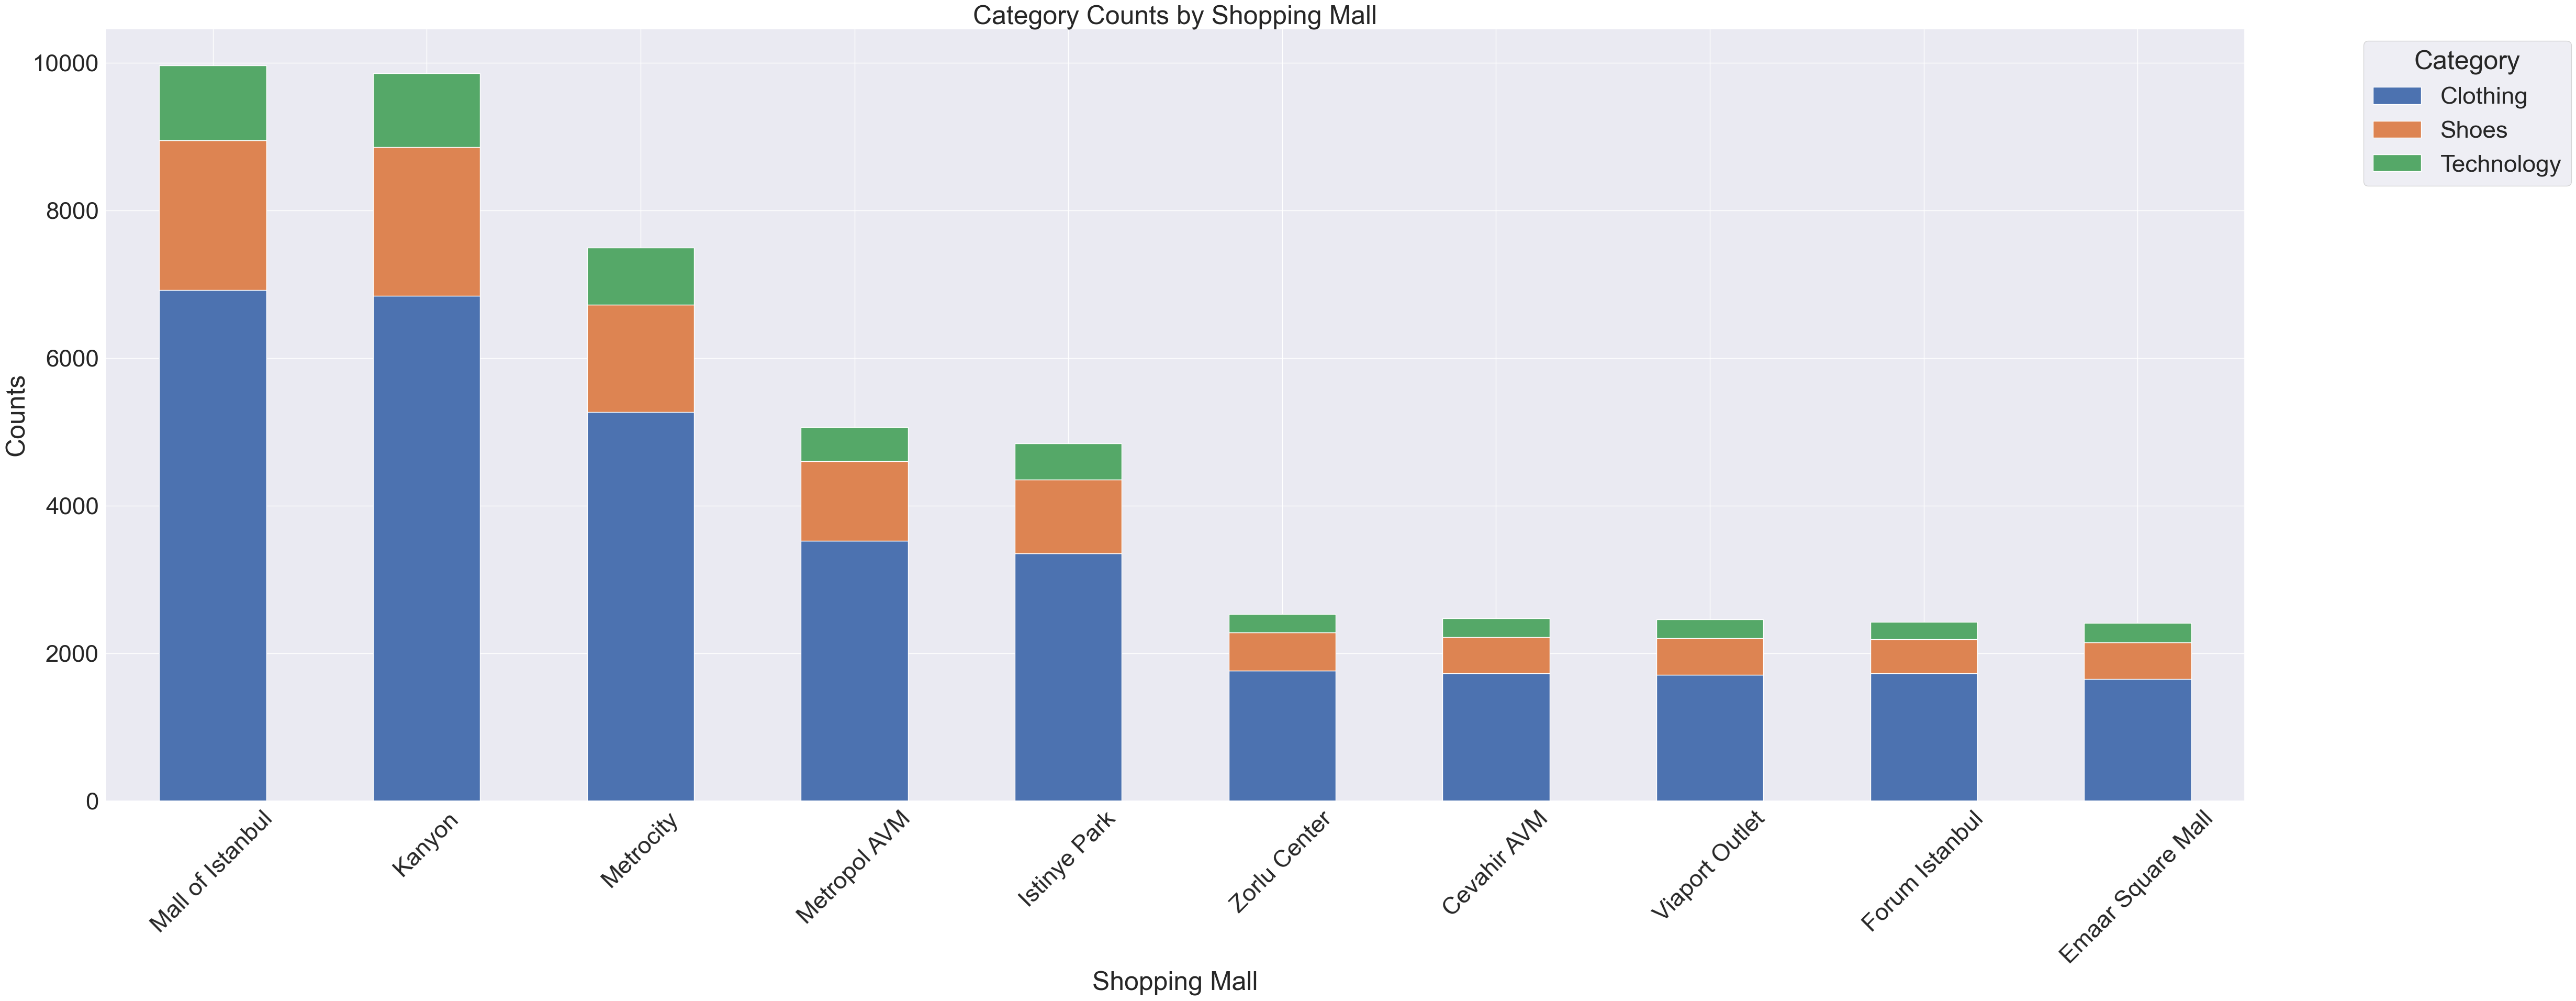

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Clothing', 'Shoes', 'Technology' 카테고리에 해당하는 거래만 필터링
filtered_df = co_df[co_df['category'].isin(['Clothing', 'Shoes', 'Technology'])]

# 쇼핑몰 별로 카테고리별 거래 횟수 계산
category_counts_by_mall = filtered_df.groupby(['shopping_mall', 'category']).size().unstack(fill_value=0)

# 각 쇼핑몰의 카테고리별 거래 횟수 합계 계산
total_counts_by_mall = category_counts_by_mall.sum(axis=1)

# 거래 횟수가 많은 순으로 정렬
total_counts_by_mall = total_counts_by_mall.sort_values(ascending=False)

# 정렬된 순서대로 쇼핑몰을 다시 정렬
sorted_category_counts_by_mall = category_counts_by_mall.loc[total_counts_by_mall.index]

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axes = plt.subplots(1, 1, figsize=(50, 20))  # figsize를 수정하여 그래프 크기 조정

# 막대 그래프로 시각화
sorted_category_counts_by_mall.plot(kind='bar', stacked=True, ax=axes)  # 막대 그래프 생성
axes.set_title('Category Counts by Shopping Mall')  # 그래프 제목 설정
axes.set_xlabel('Shopping Mall')  # x축 라벨 설정
axes.set_ylabel('Counts')  # y축 라벨 설정
axes.tick_params(axis='x', rotation=45)  # x축 라벨 회전
axes.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 추가

plt.tight_layout()  # 그래프 여백 조정
plt.show()  # 그래프 출력


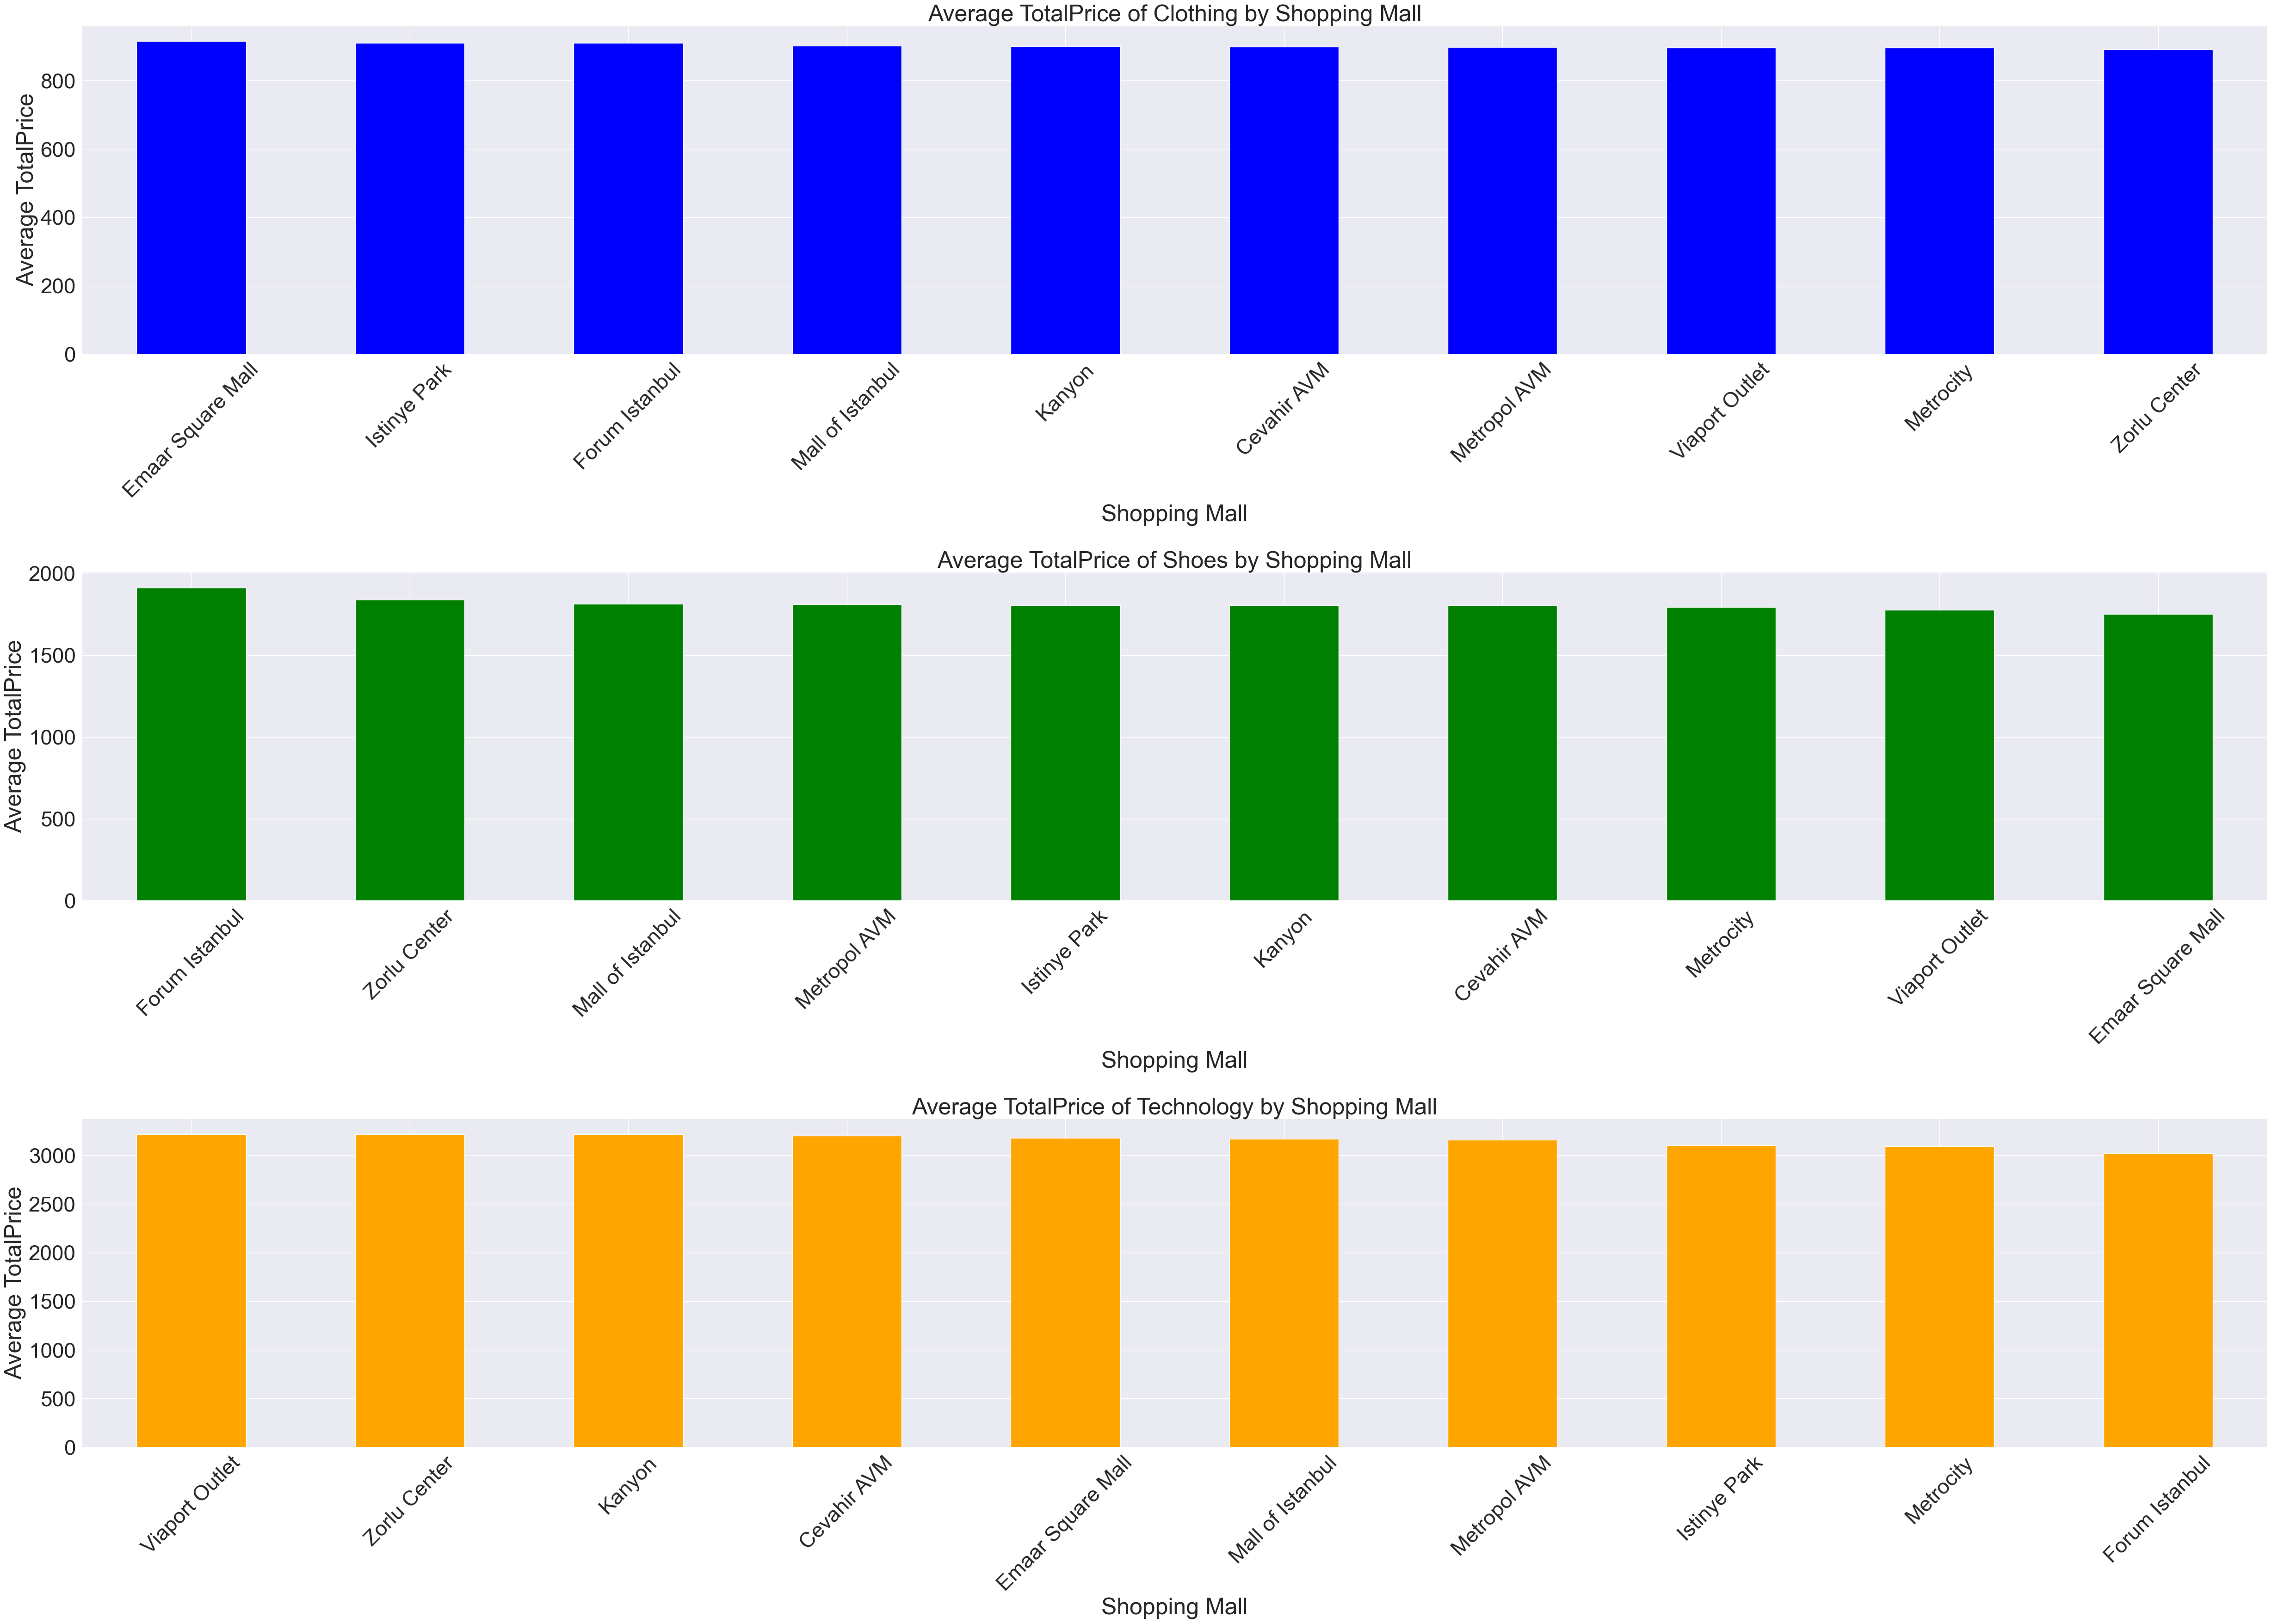

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

average_price_by_mall_category = filtered_df.groupby(['shopping_mall', 'category'])['price'].mean().unstack()
sorted_average_price_clothing = average_price_by_mall_category['Clothing'].sort_values(ascending=False)
sorted_average_price_shoes = average_price_by_mall_category['Shoes'].sort_values(ascending=False)
sorted_average_price_technology = average_price_by_mall_category['Technology'].sort_values(ascending=False)

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(50, 36))  # 3개의 서브플롯을 가진 그래프 생성

# Clothing 카테고리 그래프
sorted_average_price_clothing.plot(kind='bar', color='blue', ax=axes[0])  # 첫 번째 서브플롯에 그래프 생성
axes[0].set_title('Average TotalPrice of Clothing by Shopping Mall')  # 제목 설정
axes[0].set_xlabel('Shopping Mall')  # x축 라벨 설정
axes[0].set_ylabel('Average TotalPrice')  # y축 라벨 설정
axes[0].tick_params(axis='x', rotation=45)  # x축 라벨 회전

# Shoes 카테고리 그래프
sorted_average_price_shoes.plot(kind='bar', color='green', ax=axes[1])  # 두 번째 서브플롯에 그래프 생성
axes[1].set_title('Average TotalPrice of Shoes by Shopping Mall')  # 제목 설정
axes[1].set_xlabel('Shopping Mall')  # x축 라벨 설정
axes[1].set_ylabel('Average TotalPrice')  # y축 라벨 설정
axes[1].tick_params(axis='x', rotation=45)  # x축 라벨 회전

# Technology 카테고리 그래프
sorted_average_price_technology.plot(kind='bar', color='orange', ax=axes[2])  # 세 번째 서브플롯에 그래프 생성
axes[2].set_title('Average TotalPrice of Technology by Shopping Mall')  # 제목 설정
axes[2].set_xlabel('Shopping Mall')  # x축 라벨 설정
axes[2].set_ylabel('Average TotalPrice')  # y축 라벨 설정
axes[2].tick_params(axis='x', rotation=45)  # x축 라벨 회전

plt.tight_layout()  # 그래프 여백 조정
plt.show()  # 그래프 출력


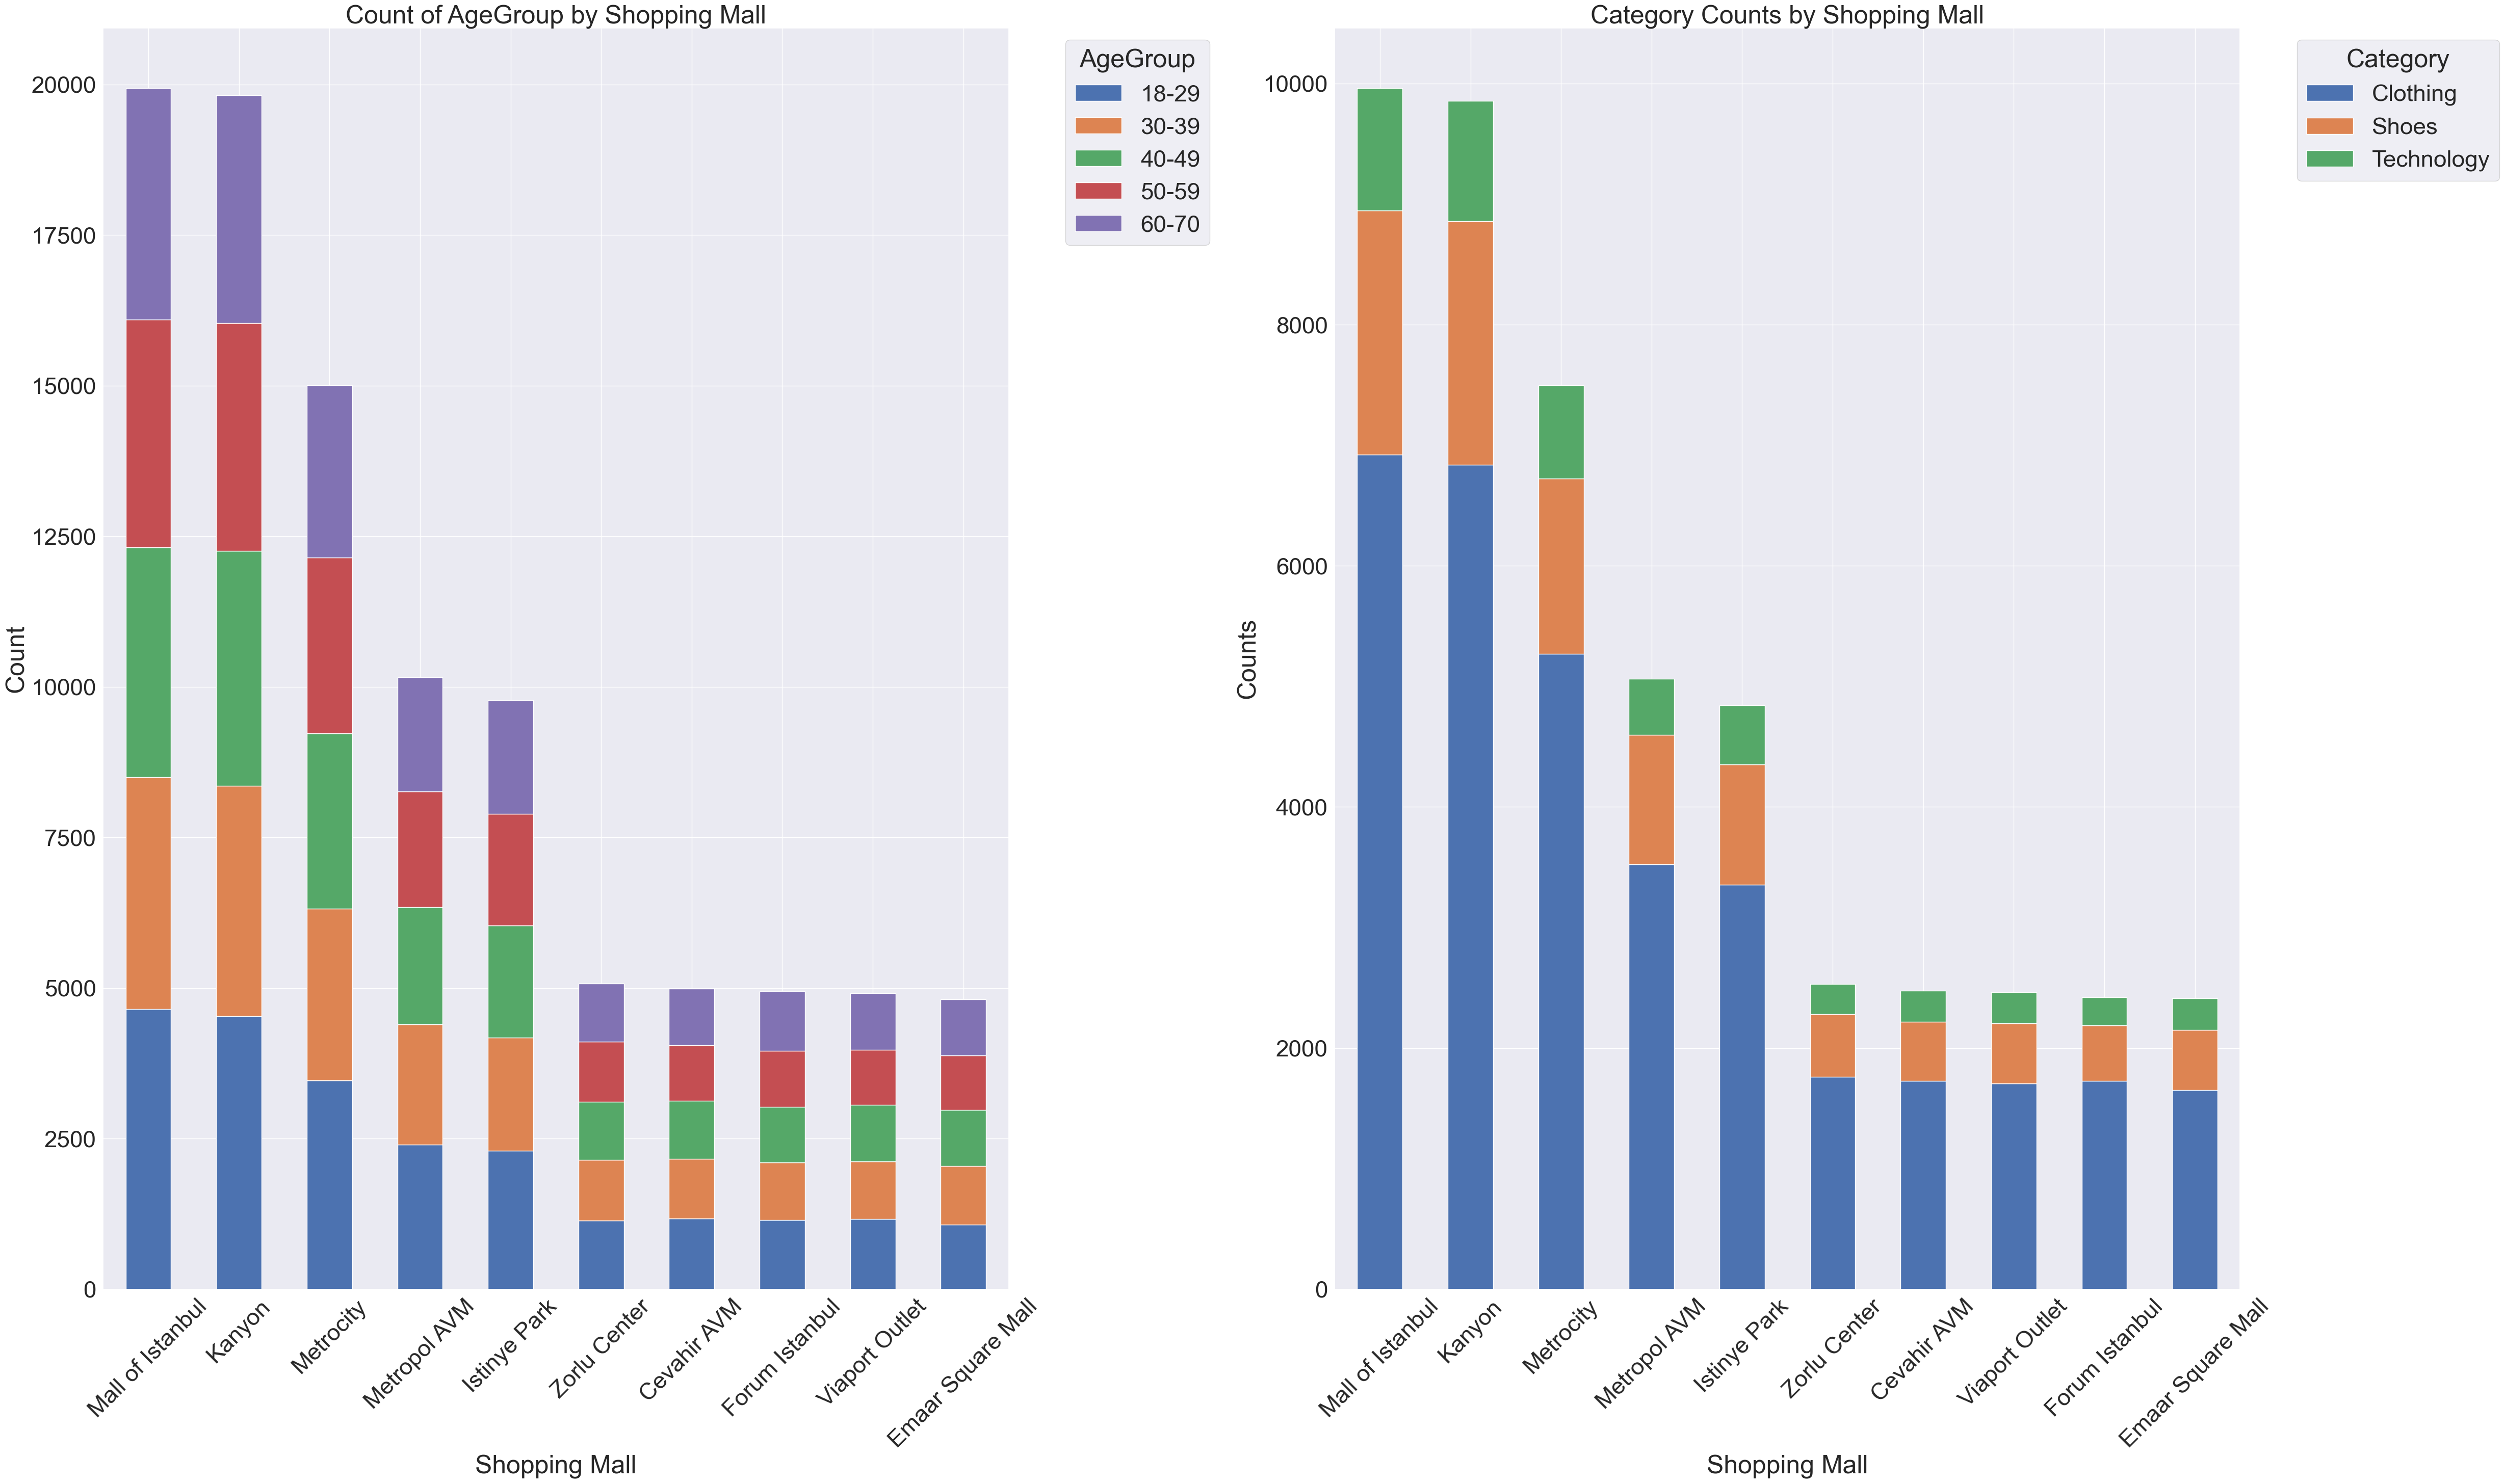

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axes = plt.subplots(1, 2, figsize=(50, 30))  # 1행 2열의 서브플롯 생성

# 첫 번째 그래프: 'AgeGroup'에 따른 쇼핑몰 별 거래 건수
agegroup_counts_by_mall = co_df.groupby('shopping_mall')['AgeGroup'].value_counts().unstack(fill_value=0)
total_counts_by_mall = agegroup_counts_by_mall.sum(axis=1)
total_counts_by_mall = total_counts_by_mall.sort_values(ascending=False)  # 쇼핑몰을 거래 건수가 큰 순서대로 정렬
sorted_agegroup_counts_by_mall = agegroup_counts_by_mall.loc[total_counts_by_mall.index]  # 정렬된 순서대로 DataFrame 재배열
sorted_agegroup_counts_by_mall.plot(kind='bar', stacked=True, ax=axes[0])  # 첫 번째 서브플롯에 그래프 생성
axes[0].set_title('Count of AgeGroup by Shopping Mall')  # 제목 설정
axes[0].set_xlabel('Shopping Mall')  # x축 라벨 설정
axes[0].set_ylabel('Count')  # y축 라벨 설정
axes[0].tick_params(axis='x', rotation=45)  # x축 라벨 회전
axes[0].legend(title='AgeGroup', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 추가

# 두 번째 그래프: 카테고리별 거래 횟수
filtered_df = co_df[co_df['category'].isin(['Clothing', 'Shoes', 'Technology'])]
category_counts_by_mall = filtered_df.groupby(['shopping_mall', 'category']).size().unstack(fill_value=0)
total_counts_by_mall = category_counts_by_mall.sum(axis=1)
total_counts_by_mall = total_counts_by_mall.sort_values(ascending=False)
sorted_category_counts_by_mall = category_counts_by_mall.loc[total_counts_by_mall.index]
sorted_category_counts_by_mall.plot(kind='bar', stacked=True, ax=axes[1])  # 두 번째 서브플롯에 그래프 생성
axes[1].set_title('Category Counts by Shopping Mall')  # 제목 설정
axes[1].set_xlabel('Shopping Mall')  # x축 라벨 설정
axes[1].set_ylabel('Counts')  # y축 라벨 설정
axes[1].tick_params(axis='x', rotation=45)  # x축 라벨 회전
axes[1].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 추가

plt.tight_layout()  # 그래프 여백 조정
plt.show()  # 그래프 출력


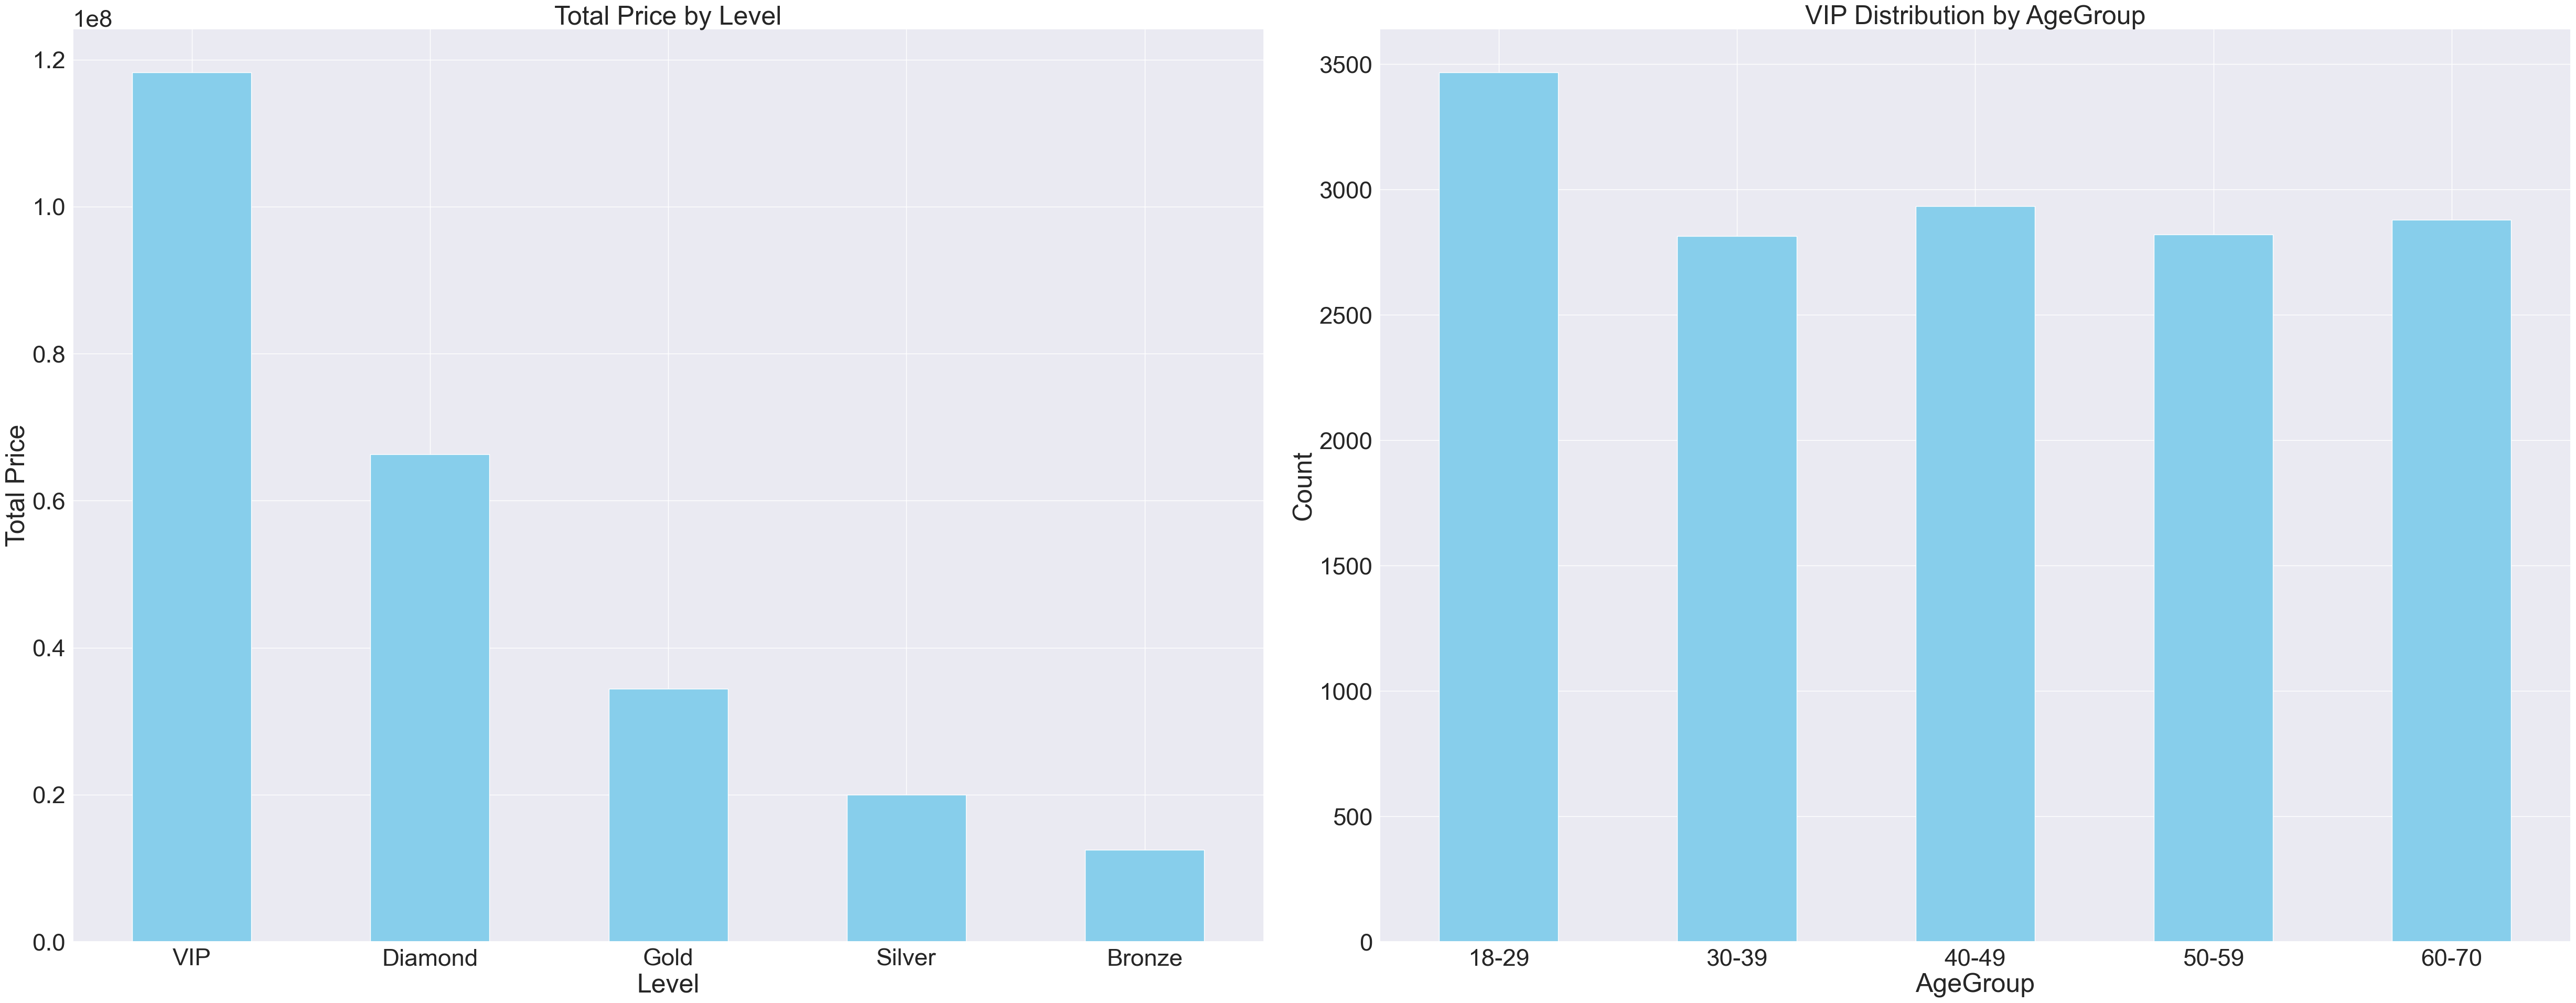

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axs = plt.subplots(1, 2, figsize=(50, 20))  # 1행 2열의 subplot 생성

# Level별 Total Price 합계 계산
total_price_by_level = co_df.groupby('Level')['totalPrice'].sum()

# Level별 Total Price 합계를 내림차순으로 정렬
total_price_by_level_sorted = total_price_by_level.sort_values(ascending=False)

# VIP 등급에 해당하는 행들만 필터링
vip_data = co_df[co_df['Level'] == 'VIP']

# VIP 등급에 해당하는 데이터를 기준으로 AgeGroup을 그룹화하여 각 그룹의 크기를 세기
grouped = vip_data.groupby('AgeGroup').size()

# 첫 번째 subplot: Total Price by Level
total_price_by_level_sorted.plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Total Price by Level')
axs[0].set_xlabel('Level')
axs[0].set_ylabel('Total Price')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)  # x 축 라벨 회전

# 두 번째 subplot: VIP Distribution by AgeGroup
grouped.plot(kind='bar', color='skyblue', ax=axs[1])
axs[1].set_title('VIP Distribution by AgeGroup')
axs[1].set_xlabel('AgeGroup')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)  # x 축 라벨 회전

plt.tight_layout()  # 그래프 간격 조정
plt.show()


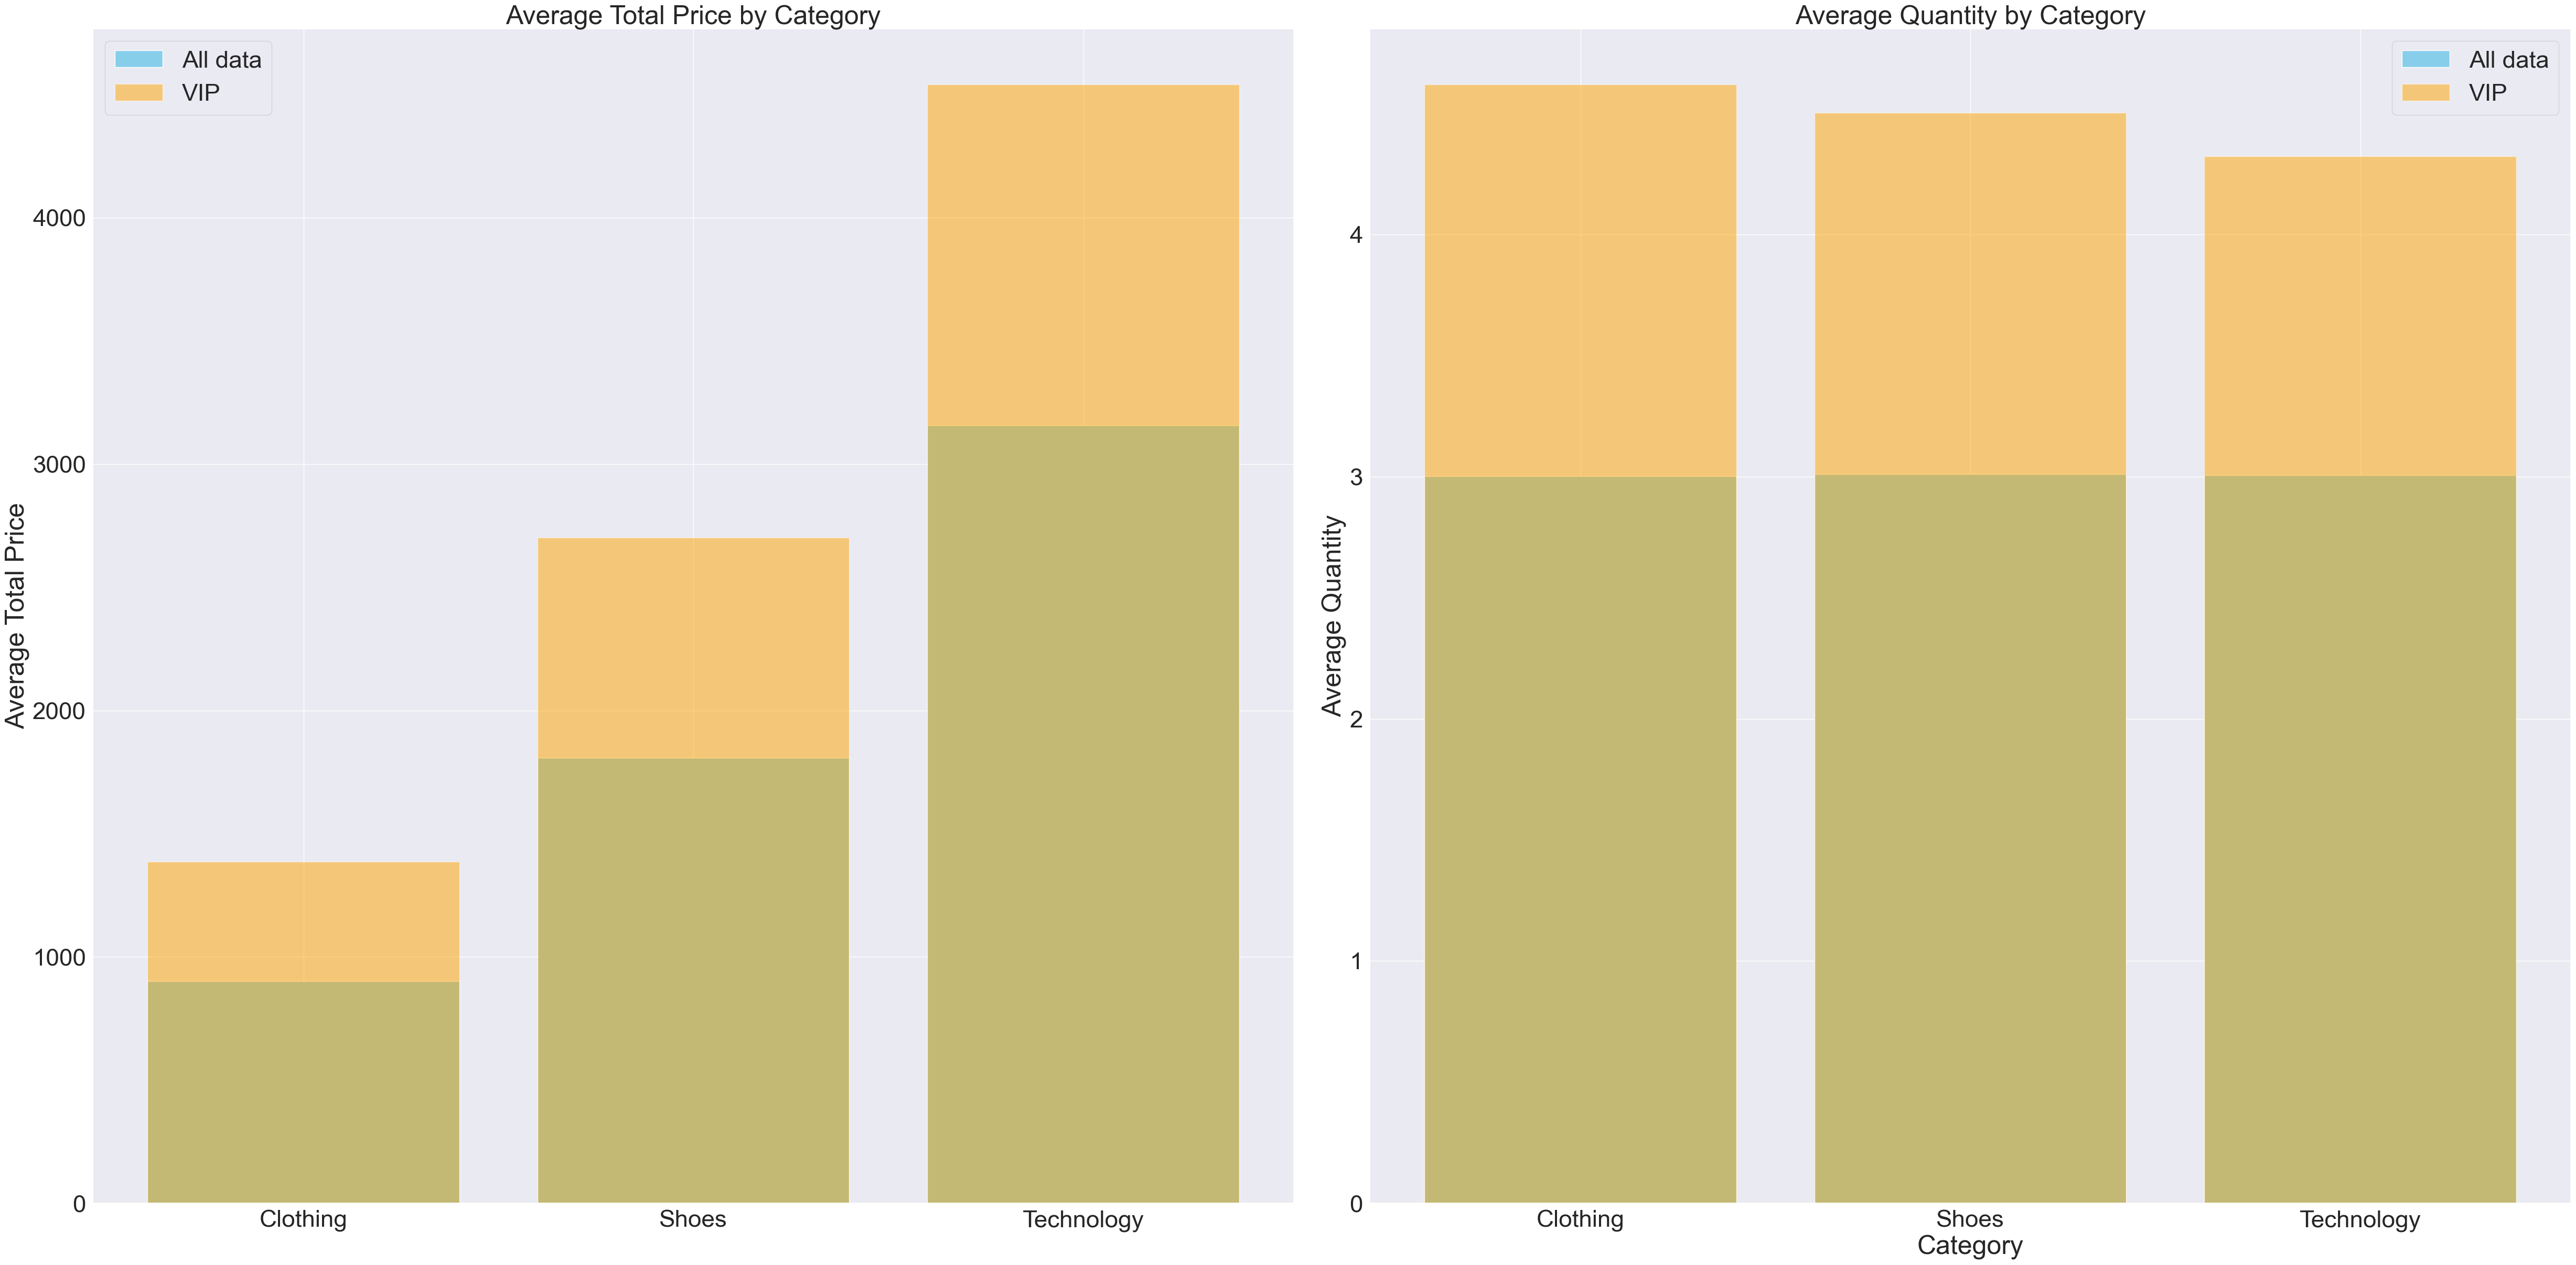

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axs = plt.subplots(1, 2, figsize=(50, 25))  # 1행 2열의 subplot 생성

# 카테고리 리스트
categories = ['Clothing', 'Shoes', 'Technology']

# Total price 데이터
total_price_means_total = [901.0840212253893, 1807.3885678692443, 3156.935548438751]
total_price_means_vip = [1385.9008947504524, 2701.901354500437, 4539.388992537313]

# Quantity 데이터
quantity_means_total = [3.0028126540435527, 3.0114610324895357, 3.006605284227382]
quantity_means_vip = [4.618438065683993, 4.501893387707544, 4.323227611940299]

# Total price subplot
axs[0].bar(categories, total_price_means_total, color='skyblue', label='All data')
axs[0].bar(categories, total_price_means_vip, color='orange', label='VIP', alpha=0.5)
axs[0].set_title('Average Total Price by Category')
axs[0].set_ylabel('Average Total Price')
axs[0].legend()

# Quantity subplot
axs[1].bar(categories, quantity_means_total, color='skyblue', label='All data')
axs[1].bar(categories, quantity_means_vip, color='orange', label='VIP', alpha=0.5)
axs[1].set_title('Average Quantity by Category')
axs[1].set_ylabel('Average Quantity')
axs[1].set_xlabel('Category')
axs[1].legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()


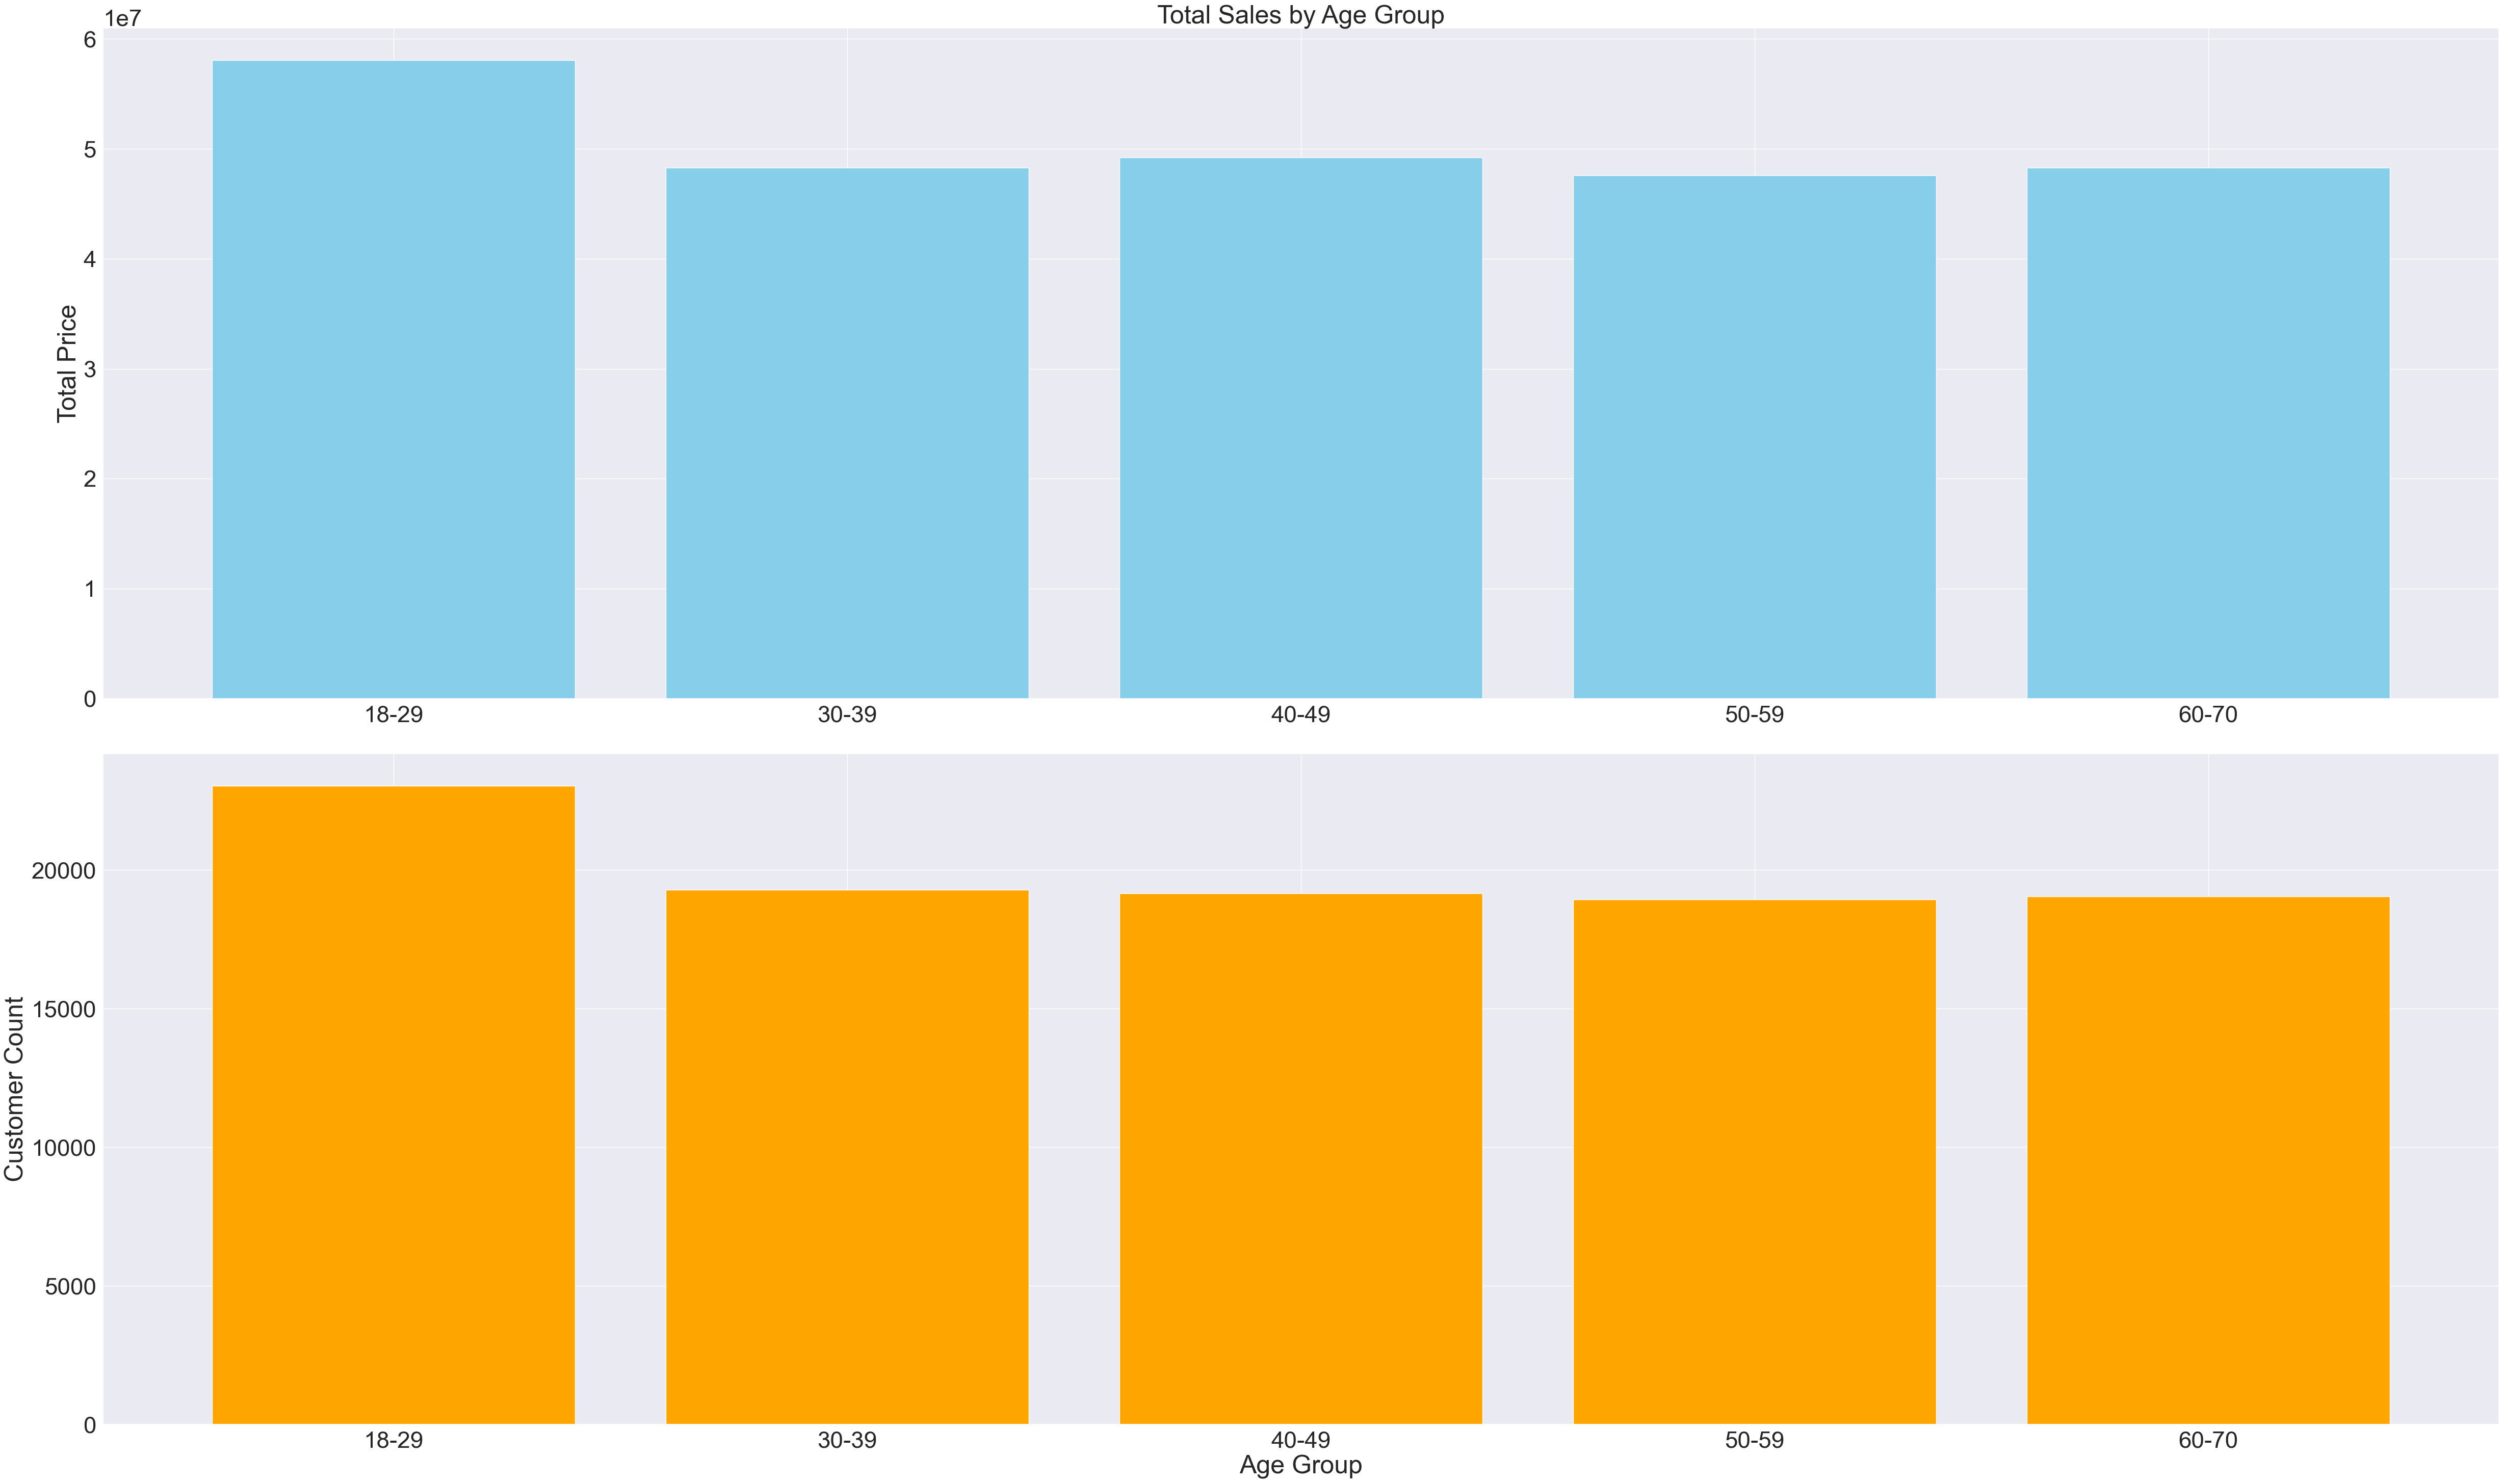

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, axs = plt.subplots(2, 1, figsize=(50, 30))  # 2행 1열의 subplot 생성

# 각 나이대별 고객 수 계산
customer_count_by_age_group = co_df['AgeGroup'].value_counts()

# 나이대를 순서대로 정렬하여 데이터 정렬
total_price_by_age_group = total_price_by_age_group.sort_index()
customer_count_by_age_group = customer_count_by_age_group.sort_index()

# 첫 번째 subplot: Total Price
axs[0].bar(total_price_by_age_group.index, total_price_by_age_group, color='skyblue')
axs[0].set_title('Total Sales by Age Group')
axs[0].set_ylabel('Total Price')

# 두 번째 subplot: Customer Count
axs[1].bar(customer_count_by_age_group.index, customer_count_by_age_group, color='orange')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Customer Count')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


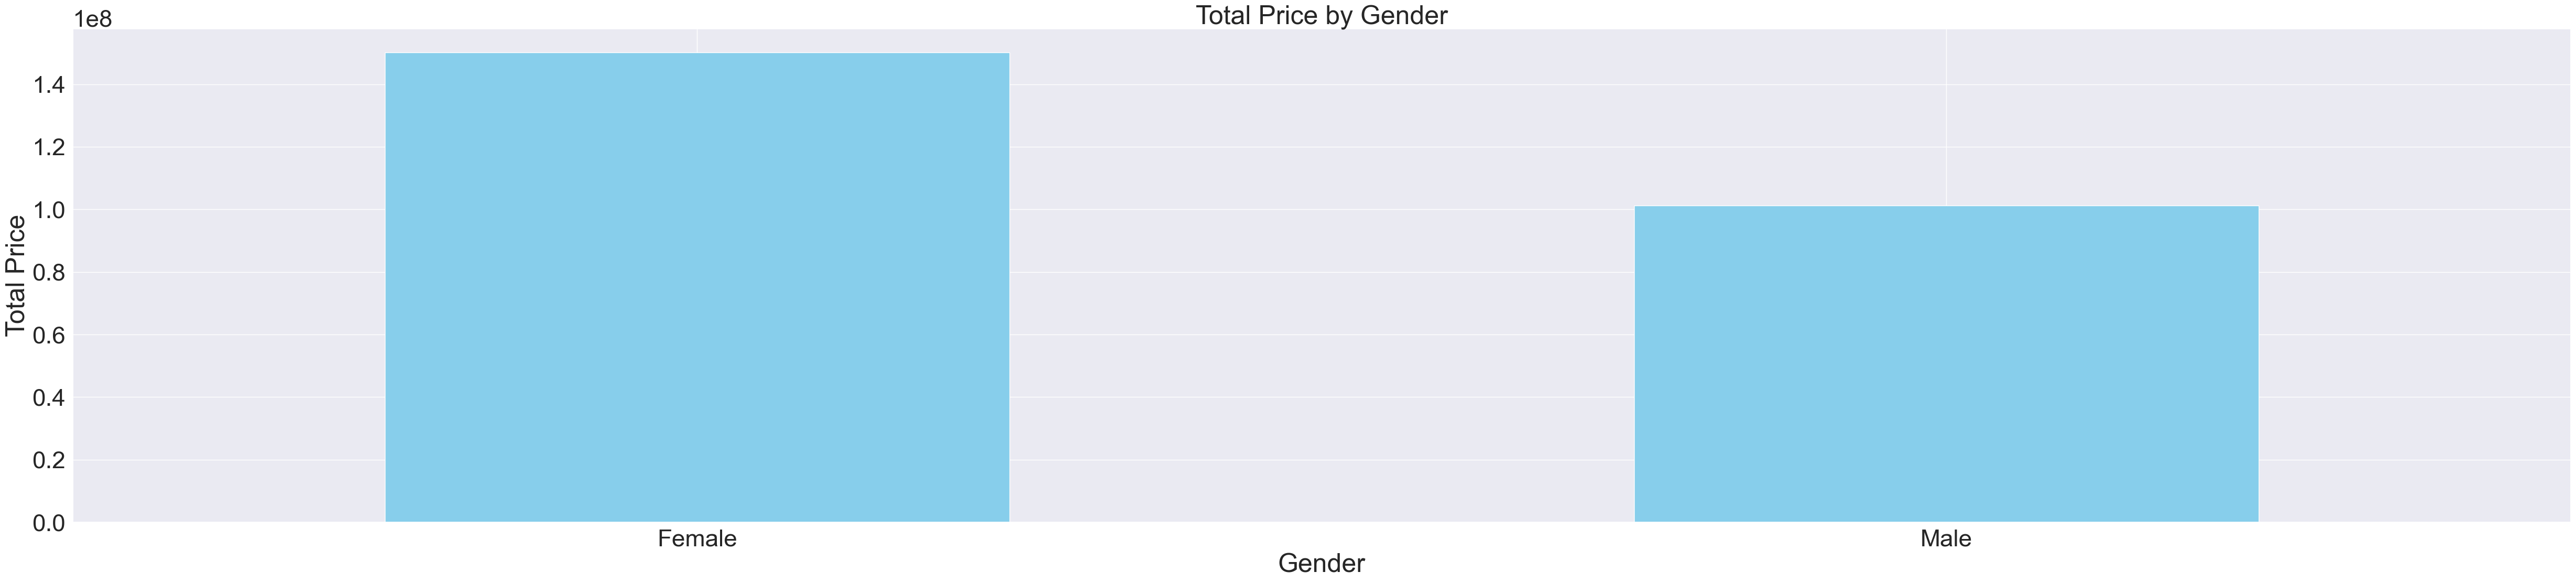

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
sns.set(font_scale=3)  # 폰트 크기 설정
fig, ax = plt.subplots(1, 1, figsize=(50, 12))  # 1행 1열의 subplot 생성

# 성별별로 totalprice 합산
gender_total_price = co_df.groupby('gender')['totalPrice'].sum()

# 막대 그래프로 시각화
gender_total_price.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Total Price by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Total Price')
ax.tick_params(axis='x', rotation=0)  # x 축 라벨 회전

plt.tight_layout()  # 그래프 간격 조정
plt.show()


### 마케팅 전략 제안


> 전체 물품대금 중 95%는 옷,신발, 전자기기이다.  
> 물품 가격에 대한 영향이 적고 젊은 층의 비율이 많을수록 많은 관심을 보이고있다. MD들의 유행을 따라가는 능력이 판매량을 좌우한다.  
> VIP의 가장 높은 비율을 20대 이며 평균적인 소비의 1.5배를 소비하며 매출을 이끌고있다.
> 젊은 VIP를 위한 마케팅을 진행하고 고객이탈을 막아야한다.


> 온라인 매장을 구축(없다면)해서 젊은층에게 더 쉽게 구매 할 수 있는 플렛폼을 구축해야한다.
> 젊은 층이 많이 볼수있는 곳에 마케팅을 진행하면 마케팅 효과를 높일 수 있다.
> 젊은 층에게는 비교적 가격대가 저렴한 의류, 신발의 상품을 추천하며 지속적인 구매를 유도해야한다.
> 추가로 40대의 구매비율도 높은편이다. 이 부분에서는 젊은 자녀에게 선물할 수 있는 비교적 가격대가 높은 전자기기의 상품을 추천해준다.


